In [ ]:
import pandas as pd
df_SRA_repo = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations.csv", index_col=False, encoding='utf-8')
print(len(df_SRA_repo))

4179


In [ ]:
df_SRA_repo.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2'], inplace=True)

In [ ]:
df_SRA_repo

,Repository,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,published_doi,accession,...,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,earliest_SRR_published_date,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,PMC,PMID,number_of_citations
0,SRA,SRA IDs shared in both,Yes,Code based,NaN,TRANSCRIPTOMIC,Homo sapiens;Mus musculus,10.1101/000422,10.3389/fgene.2014.00013,SRR797058,...,NaN,NaN,NaN,2013-06-27,-140.0,-218.0,1.0,PMC3908319,24567737,94
1,SRA,SRA IDs shared in both,Yes,Code based,AMPLICON,GENOMIC,Homo sapiens,10.1101/001370,10.1038/nmeth.3069,SRX386284,...,NaN,66.7%,{285},2013-12-04,-9.0,-256.0,1.0,PMC4180789,25128977,124
2,SRA,SRA IDs shared in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Rattus norvegicus,10.1101/003202,10.1093/hmg/ddu359,ERA261116,...,NaN,NaN,NaN,2013-12-21,-74.0,-202.0,1.0,PMC4240194,25015099,96
3,SRA,SRA IDs shared in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/005611,10.1371/journal.pone.0103207,SRX516577,...,NaN,NaN,NaN,2014-06-03,6.0,-71.0,3.0,PMC4132098,25119138,135
4,SRA,SRA IDs shared in both,Yes,Code based,OTHER,TRANSCRIPTOMIC,Saccharomyces cerevisiae,10.1101/006221,10.1101/gr.175893.114,SRS514738,...,NaN,NaN,NaN,2014-09-30,111.0,-7.0,3.0,PMC4248317,25294246,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,SRA,SRA IDs shared in both,Yes,Code based,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/2021.03.16.435730,10.7554/eLife.70207,PRJNA664644,...,NaN,NaN,NaN,2020-09-21,-177.0,-501.0,1.0,PMC8816380,35119362,9
4175,SRA,SRA IDs shared in both,Yes,Code based,WGS,GENOMIC,Staphylococcus aureus,10.1101/058842,10.1038/ncomms14403,PRJEB14381,...,NaN,NaN,NaN,2016-06-17,3.0,-234.0,3.0,PMC5303874,28165454,13
4176,SRA,SRA IDs shared only in pub,Yes,Code based,WGA,VIRAL RNA,Severe acute respiratory syndrome coronavirus 2,10.1101/2020.04.30.070771,10.1371/journal.pone.0241942,ERP127101,...,98.8%,1.1%,"{1, 7, 7, 12, 7, 4, 5, 1, 12, 1, 1, 2, 1, 1, 1...",2021-03-16,320.0,-168.0,3.0,PMC8407536,34464385,5
4177,SRA,SRA IDs shared in both,Yes,Code based,WGS,GENOMIC,Escherichia coli,10.1101/041327,10.1371/journal.pmed.1002055,PRJNA218110,...,99.9%,0.1%,"{1461, 365, 366, 730, 365, 1825, 365, 366, 365...",2014-09-10,-533.0,-692.0,1.0,PMC4970813,27483136,57


## **Statistics on how many times that authors upload SRR runs**

### Firstly, deal with SRA IDs that were mentioned in both preprint and publication

In [ ]:
import pandas as pd
import ast

df_SRA_IDs_in_both = df_SRA_repo[df_SRA_repo['Sharing Scenario'] == 'SRA IDs shared in both']

def x_studies_uploaded_all_sequencing_data_on_y_times(row):
    try:
        dict_row = ast.literal_eval(row)
        if isinstance(dict_row, dict):
           return len(dict_row)

    except:
           return 'An error occured'  # in case the row cannot be converted to a dictionary

df_SRA_IDs_in_both['upload_times'] = df_SRA_IDs_in_both["{'SRR_Date' : 'rate'}"].apply(x_studies_uploaded_all_sequencing_data_on_y_times)
how_many_times = df_SRA_IDs_in_both['upload_times'].tolist()
how_many_times_sorted = sorted(how_many_times)
several_scenarios = pd.Series(how_many_times_sorted).unique()
print(several_scenarios)

[   1    2    3    4    5    6    8    9   14   23   37   41 2015]


<ipython-input-3-1dba6c4e2e6b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SRA_IDs_in_both['upload_times'] = df_SRA_IDs_in_both["{'SRR_Date' : 'rate'}"].apply(x_studies_uploaded_all_sequencing_data_on_y_times)


In [ ]:
print(len(df_SRA_IDs_in_both))

1875


In [ ]:
import pandas as pd
import ast
for item in several_scenarios:
    count = 0
    for row in df_SRA_IDs_in_both["{'SRR_Date' : 'rate'}"]:
        # Convert the string representation of a dictionary to an actual dictionary
        try:
            dict_row = ast.literal_eval(row)
            if isinstance(dict_row, dict) and len(dict_row) == item:
                count += 1
        except:
            pass  # in case the row cannot be converted to a dictionary
    print(f"{count} studies released all SRR runs in {item} time/times")

1579 studies released all SRR runs in 1 time/times
189 studies released all SRR runs in 2 time/times
61 studies released all SRR runs in 3 time/times
21 studies released all SRR runs in 4 time/times
7 studies released all SRR runs in 5 time/times
9 studies released all SRR runs in 6 time/times
2 studies released all SRR runs in 8 time/times
1 studies released all SRR runs in 9 time/times
1 studies released all SRR runs in 14 time/times
1 studies released all SRR runs in 23 time/times
1 studies released all SRR runs in 37 time/times
2 studies released all SRR runs in 41 time/times
1 studies released all SRR runs in 2015 time/times


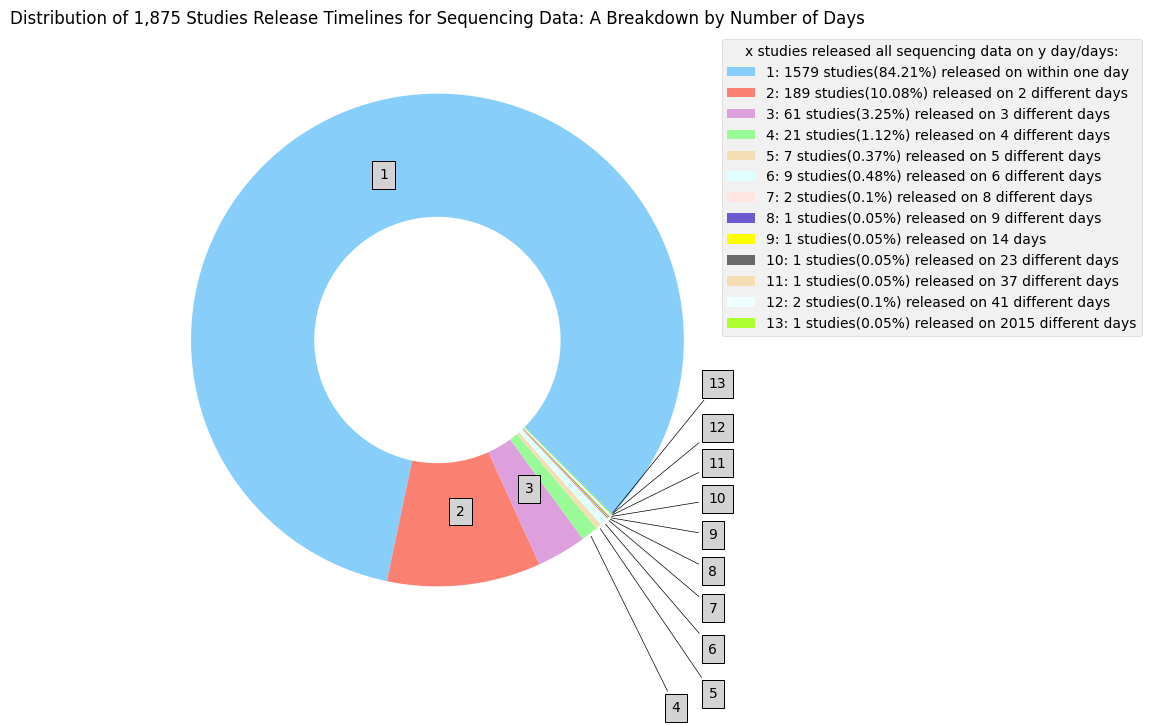

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style for the plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
sizes = [1579,189,61,21,7,9,2,1,1,1,1,2,1]
labels = ['1', '2','3','4','5','6','7','8','9','10','11','12','13']
color1 = ['lightskyblue','salmon','plum','palegreen','wheat','lightcyan',
          'mistyrose','slateblue','yellow','dimgrey','wheat','azure',
          'greenyellow','crimson','beige']
wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-45, colors=color1)
bbox_props = dict(boxstyle="square,pad=0.5",color="black",fc="lightgray", ec="black", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-",color="black"),
          bbox=bbox_props, zorder=10, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    if i <= 2:
      text_x = 0.7 * x
      text_y = 0.7 * y
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      ax.annotate(labels[i],
                xy=(x, y),  # This is the position of the wedge.
                xytext=(text_x, text_y),  # This is the position of the text.
                horizontalalignment=horizontalalignment,
                verticalalignment='center',  # Center the text vertically in the slice.
                bbox=bbox_props)
    elif i == 3:
      ax.annotate(labels[i], xy=(x, y), xytext=(0.95*np.sign(x), 1.9*y),
                  **kw)
    elif i == 4:
       ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.9*y),
                  **kw)
    elif i == 5:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.7*y),
                  **kw)
    elif i == 6:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.5*y),
                  **kw)
    elif i == 7:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.3*y),
                  **kw)
    elif i == 8:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                  **kw)
    elif i == 9:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 0.9*y),
                  **kw)
    elif i == 10:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 0.7*y),
                  **kw)
    elif i == 11:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 0.5*y),
                  **kw)
    elif i == 12:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 0.25*y),
                  **kw)

# Create a list of more descriptive labels
descriptive_labels = [
    "1: 1579 studies(84.21%) released on within one day",
    "2: 189 studies(10.08%) released on 2 different days",
    "3: 61 studies(3.25%) released on 3 different days",
    "4: 21 studies(1.12%) released on 4 different days",
    "5: 7 studies(0.37%) released on 5 different days",
    "6: 9 studies(0.48%) released on 6 different days",
    "7: 2 studies(0.1%) released on 8 different days",
    "8: 1 studies(0.05%) released on 9 different days",
    "9: 1 studies(0.05%) released on 14 days",
    "10: 1 studies(0.05%) released on 23 different days",
    "11: 1 studies(0.05%) released on 37 different days",
    "12: 2 studies(0.1%) released on 41 different days",
    "13: 1 studies(0.05%) released on 2015 different days"
]
ax.legend(wedges, descriptive_labels, loc="upper left",title="x studies released all sequencing data on y day/days:",bbox_to_anchor=(0.95, 0, 0.4, 1))

ax.set_title("Distribution of 1,875 Studies Release Timelines for Sequencing Data: A Breakdown by Number of Days",size=12)

plt.show()

### Secondly, deal with SRA IDs that were mentioned only in publication

In [ ]:
import pandas as pd
import ast

df_SRA_IDs_only_in_pub = df_SRA_repo[df_SRA_repo['Sharing Scenario'] == 'SRA IDs shared only in pub']

def x_studies_uploaded_all_sequencing_data_on_y_times(row):
    try:
        dict_row = ast.literal_eval(row)
        if isinstance(dict_row, dict):
           return len(dict_row)

    except:
           return 'An error occured'  # in case the row cannot be converted to a dictionary

df_SRA_IDs_only_in_pub['upload_times'] = df_SRA_IDs_only_in_pub["{'SRR_Date' : 'rate'}"].apply(x_studies_uploaded_all_sequencing_data_on_y_times)
how_many_times2 = df_SRA_IDs_only_in_pub['upload_times'].tolist()
how_many_times_sorted2 = sorted(how_many_times2)
several_scenarios2 = pd.Series(how_many_times_sorted2).unique()
print(several_scenarios2)

[ 1  2  3  4  5  6  7  8  9 10 13 15 59 67 78]


<ipython-input-4-58585b919ae2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SRA_IDs_only_in_pub['upload_times'] = df_SRA_IDs_only_in_pub["{'SRR_Date' : 'rate'}"].apply(x_studies_uploaded_all_sequencing_data_on_y_times)


In [ ]:
print(len(df_SRA_IDs_only_in_pub))

2304


In [ ]:
import pandas as pd
import ast
for item2 in several_scenarios2:
    count2 = 0
    for row in df_SRA_IDs_only_in_pub["{'SRR_Date' : 'rate'}"]:
        # Convert the string representation of a dictionary to an actual dictionary
        try:
            dict_row = ast.literal_eval(row)
            if isinstance(dict_row, dict) and len(dict_row) == item2:
                count2 += 1
        except:
            pass  # in case the row cannot be converted to a dictionary
    print(f"{count2} studies released all SRR runs in {item2} time/times")

2082 studies released all SRR runs in 1 time/times
145 studies released all SRR runs in 2 time/times
35 studies released all SRR runs in 3 time/times
20 studies released all SRR runs in 4 time/times
9 studies released all SRR runs in 5 time/times
3 studies released all SRR runs in 6 time/times
1 studies released all SRR runs in 7 time/times
1 studies released all SRR runs in 8 time/times
2 studies released all SRR runs in 9 time/times
1 studies released all SRR runs in 10 time/times
1 studies released all SRR runs in 13 time/times
1 studies released all SRR runs in 15 time/times
1 studies released all SRR runs in 59 time/times
1 studies released all SRR runs in 67 time/times
1 studies released all SRR runs in 78 time/times


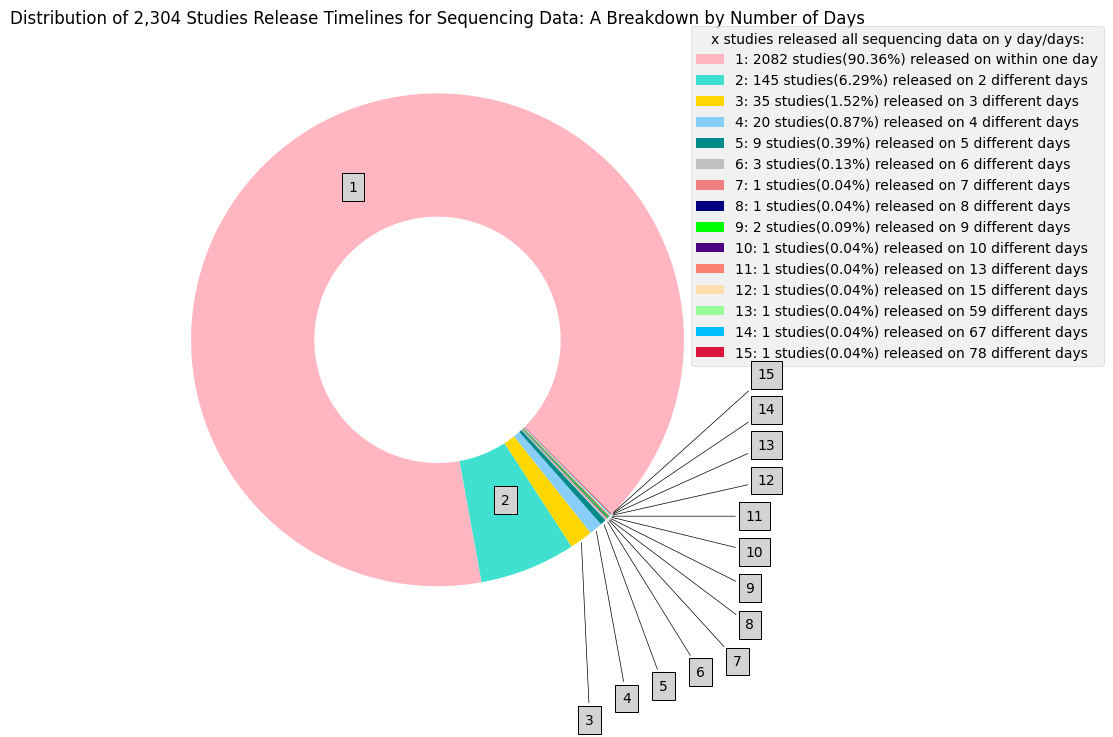

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style for the plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
sizes = [2082,145,35,20,9,3,1,1,2,1,1,1,1,1,1]
labels = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15']

colors2 = ['lightpink','turquoise','gold','lightskyblue','darkcyan','silver',
           'lightcoral','navy','lime','indigo','salmon','navajowhite','palegreen','deepskyblue','crimson']
wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-45, colors=colors2)
bbox_props = dict(boxstyle="square,pad=0.5",color="black",fc="lightgray", ec="black", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-",color="black"),
          bbox=bbox_props, zorder=10, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    if i <= 1:
      text_x = 0.7 * x
      text_y = 0.7 * y
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      ax.annotate(labels[i],
                xy=(x, y),  # This is the position of the wedge.
                xytext=(text_x, text_y),  # This is the position of the text.
                horizontalalignment=horizontalalignment,
                verticalalignment='center',  # Center the text vertically in the slice.
                bbox=bbox_props)
    elif i == 2:
      ax.annotate(labels[i], xy=(x, y), xytext=(0.6*np.sign(x), 1.9*y),
                  **kw)
    elif i == 3:
      ax.annotate(labels[i], xy=(x, y), xytext=(0.75*np.sign(x), 1.9*y),
                  **kw)
    elif i == 4:
       ax.annotate(labels[i], xy=(x, y), xytext=(0.9*np.sign(x), 1.9*y),
                  **kw)
    elif i == 5:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.85*y),
                  **kw)
    elif i == 6:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.80*y),
                  **kw)
    elif i == 7:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.6*y),
                  **kw)
    elif i == 8:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                  **kw)
    elif i == 9:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.2*y),
                  **kw)
    elif i == 10:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1*y),
                  **kw)
    elif i == 11:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.3*np.sign(x), 0.8*y),
                  **kw)
    elif i == 12:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.3*np.sign(x), 0.6*y),
                  **kw)
    elif i == 13:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.3*np.sign(x), 0.4*y),
                  **kw)
    elif i == 14:
      ax.annotate(labels[i], xy=(x, y), xytext=(1.3*np.sign(x), 0.2*y),
                  **kw)

# Create a list of more descriptive labels 2304
descriptive_labels = [
    "1: 2082 studies(90.36%) released on within one day",
    "2: 145 studies(6.29%) released on 2 different days",
    "3: 35 studies(1.52%) released on 3 different days",
    "4: 20 studies(0.87%) released on 4 different days",
    "5: 9 studies(0.39%) released on 5 different days",
    "6: 3 studies(0.13%) released on 6 different days",
    "7: 1 studies(0.04%) released on 7 different days",
    "8: 1 studies(0.04%) released on 8 different days",
    "9: 2 studies(0.09%) released on 9 different days",
    "10: 1 studies(0.04%) released on 10 different days",
    "11: 1 studies(0.04%) released on 13 different days",
    "12: 1 studies(0.04%) released on 15 different days",
    "13: 1 studies(0.04%) released on 59 different days",
    "14: 1 studies(0.04%) released on 67 different days",
    "15: 1 studies(0.04%) released on 78 different days"
]
ax.legend(wedges, descriptive_labels, loc="upper left",title="x studies released all sequencing data on y day/days:",bbox_to_anchor=(0.9, 0.02, 0.5, 1))

ax.set_title("Distribution of 2,304 Studies Release Timelines for Sequencing Data: A Breakdown by Number of Days",size=12)

plt.show()

## Investigate the sequencing data release pattern

In [ ]:
import pandas as pd
import ast

df_final = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations.csv", encoding='utf-8')
df_final.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
# Assuming 'column_name' is the name of the column containing the dictionary strings
column_name = "{'SRR_Date' : 'rate'}"  # replace with your actual column name
# Create a boolean mask
two_times = df_final[column_name].apply(lambda x: len(ast.literal_eval(x)) == 2 if isinstance(x, str) else False)

df_two_times = df_final[two_times]

more_than_two_times = df_final[column_name].apply(lambda x: len(ast.literal_eval(x)) > 2 if isinstance(x, str) else False)

df_more_than_two_times = df_final[more_than_two_times]

df_two_times.sort_values(by='Pattern_the_first_day', ascending=True, inplace=True)

df_more_than_two_times.sort_values(by='Pattern_the_first_day', ascending=True, inplace=True)

<ipython-input-9-9b2f7f3c4dae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two_times.sort_values(by='Pattern_the_first_day', ascending=True, inplace=True)
<ipython-input-9-9b2f7f3c4dae>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more_than_two_times.sort_values(by='Pattern_the_first_day', ascending=True, inplace=True)


In [ ]:
# Assuming the column 'Pattern_the_first_day' contains values like '5%', '10%', etc.
# Remove the percent sign and convert to float
df_two_times['Pattern_the_first_day'] = df_two_times['Pattern_the_first_day'].str.rstrip('%').astype(float)

<ipython-input-10-94d3af0613f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two_times['Pattern_the_first_day'] = df_two_times['Pattern_the_first_day'].str.rstrip('%').astype(float)


In [ ]:
df_more_than_two_times['Pattern_the_first_day']=df_more_than_two_times['Pattern_the_first_day'].str.rstrip('%').astype(float)
df_more_than_two_times['Pattern_the_last_day']=df_more_than_two_times['Pattern_the_last_day'].str.rstrip('%').astype(float)
df_more_than_two_times['Pattern_dates_in_the_middle']=df_more_than_two_times['Pattern_dates_in_the_middle'].str.rstrip('%').astype(float)

<ipython-input-11-1a7f2dace616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more_than_two_times['Pattern_the_first_day']=df_more_than_two_times['Pattern_the_first_day'].str.rstrip('%').astype(float)
<ipython-input-11-1a7f2dace616>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more_than_two_times['Pattern_the_last_day']=df_more_than_two_times['Pattern_the_last_day'].str.rstrip('%').astype(float)
<ipython-input-11-1a7f2dace616>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
print(len(df_two_times)) ## 189+145

334


In [ ]:
print(len(df_more_than_two_times)) # (61+21+7+9+2+2+1*5)+(35+20+9+3+2+1*8)

184


### 334 studies released sequencing data at two times:

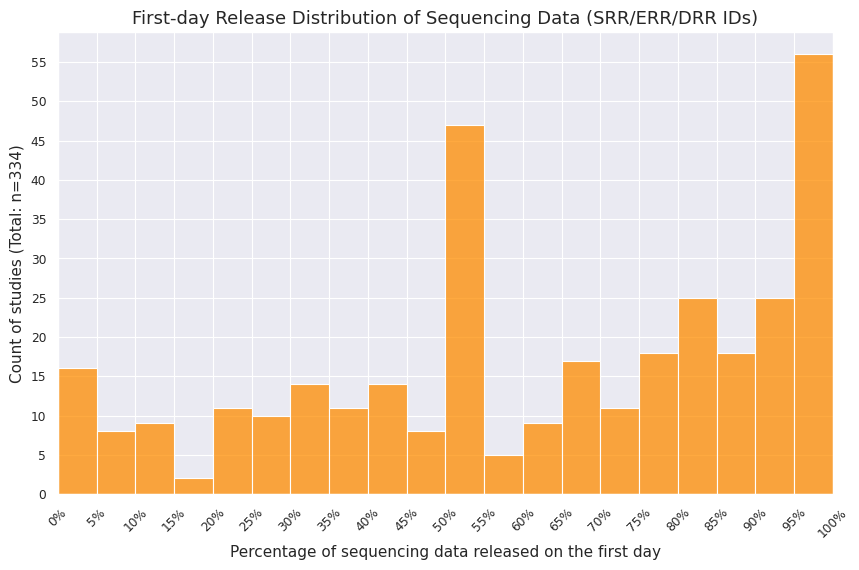

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
# Define bin edges that correspond to your desired intervals
bin_edges = np.arange(0, 101, 5)  # Creates bins from 0 to 100 with a step of 5
# Create the histogram with defined bins
ax = sns.histplot(data = df_two_times, x='Pattern_the_first_day', bins=bin_edges,color="darkorange")

# Rotate x-axis labels
plt.xticks(rotation=45)
# Set x-axis tick intervals to every 5 units (0%, 5%, 10%, 15%, ..., 100%)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# Format the tick labels as percentages
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}%'))
# Set the x-axis limits to ensure ticks start at 0% and end at 100%
ax.set_xlim(0, 100)

plt.xlabel("Percentage of sequencing data released on the first day",size=11)
plt.ylabel("Count of studies (Total: n=334)",size=11)
# Add a title to this figure
ax.set_title("First-day Release Distribution of Sequencing Data (SRR/ERR/DRR IDs)", size=13)
plt.show()

### 184 studies released sequencing data more than two times

The following graphs are for the situation that authors published SRR/ERR/DRR runs for more than two times:

The first one is the graph for the <font color='red'>first day:

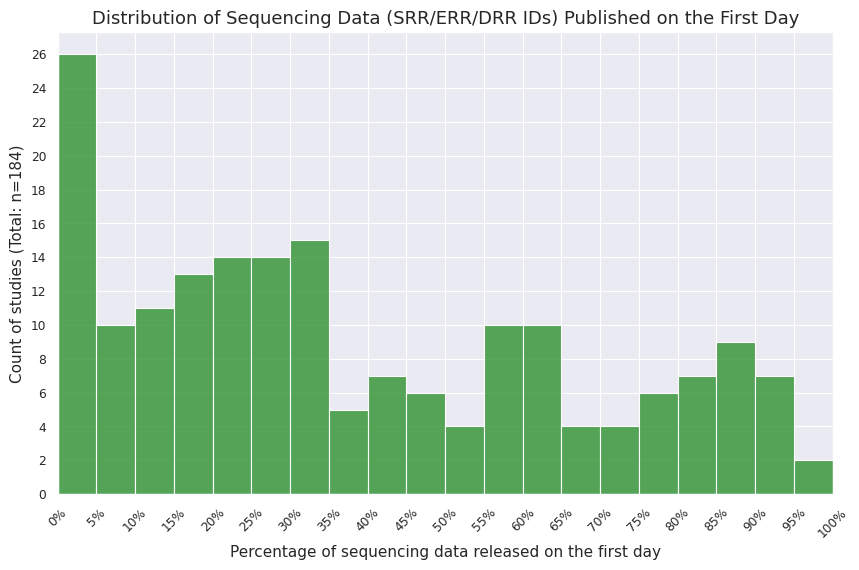

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
# Define bin edges that correspond to your desired intervals
bin_edges = np.arange(0, 101, 5)  # Creates bins from 0 to 100 with a step of 5
# Create the histogram with defined bins
ax = sns.histplot(data=df_more_than_two_times, x='Pattern_the_first_day', bins=bin_edges,color="forestgreen")

# Rotate x-axis labels
plt.xticks(rotation=45)
# Set x-axis tick intervals to every 5 units (0%, 5%, 10%, 15%, ..., 100%)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
# Format the tick labels as percentages
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}%'))
# Set the x-axis limits to ensure ticks start at 0% and end at 100%
ax.set_xlim(0, 100)

plt.xlabel("Percentage of sequencing data released on the first day",size=11)
plt.ylabel("Count of studies (Total: n=184)",size=11)
ax.set_title("Distribution of Sequencing Data (SRR/ERR/DRR IDs) Published on the First Day", size=13)
plt.show()

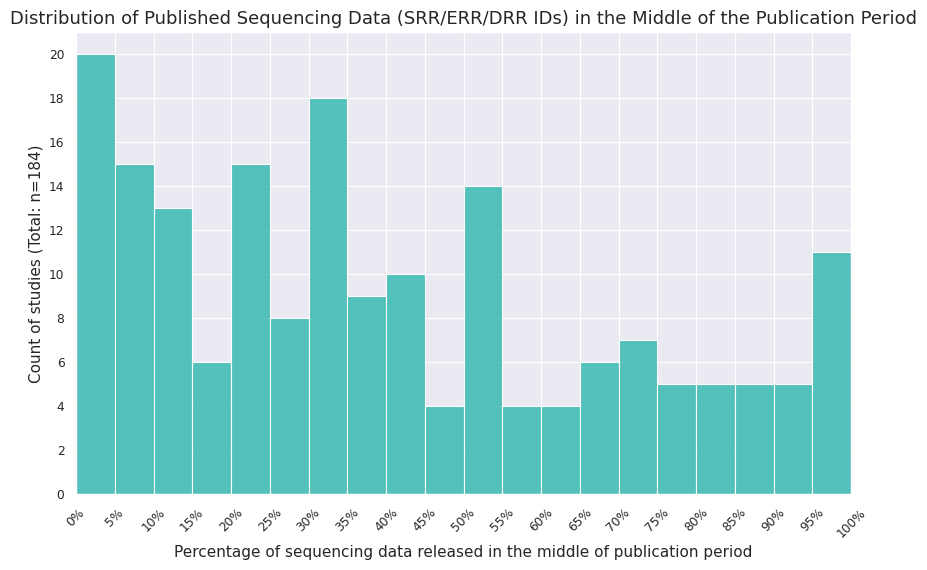

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
# Define bin edges that correspond to your desired intervals
bin_edges = np.arange(0, 101, 5)  # Creates bins from 0 to 100 with a step of 5
# Create the histogram with defined bins
ax = sns.histplot(data=df_more_than_two_times, x='Pattern_dates_in_the_middle', bins=bin_edges, color='lightseagreen')

# Rotate x-axis labels
plt.xticks(rotation=45)
# Set x-axis tick intervals to every 5 units (0%, 5%, 10%, 15%, ..., 100%)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
# Format the tick labels as percentages
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}%'))
# Set the x-axis limits to ensure ticks start at 0% and end at 100%
ax.set_xlim(0, 100)

plt.xlabel("Percentage of sequencing data released in the middle of publication period", size=11)
plt.ylabel("Count of studies (Total: n=184)",size=11)
ax.set_title("Distribution of Published Sequencing Data (SRR/ERR/DRR IDs) in the Middle of the Publication Period", size=13)
plt.show()

## SRA IDs sharing scenario based on timing, five categories

### Statistics on the time pin 1 (in total):

In [ ]:
import pandas as pd
ultimate_df = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations.csv", encoding='utf-8')
ultimate_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
count_list = []
for x in range(1, 6):
    # Count how many times 'x' appears in the 'time_pin_1' column
    count = ultimate_df[ultimate_df['time_pin_1'] == x].shape[0]
    count_list.append(count)
# Use a different variable name instead of 'sum'
# Assuming count_list is defined and contains numeric values
total_counts=count_list[0]+count_list[1]+count_list[2]+count_list[3]+count_list[4]
# Now calculate and print percentages
for x, count in enumerate(count_list, start=1):
    percentage = count / total_counts  # Use the new variable name here
    print(f"{x}: {count} ({percentage:.2%})")


1: 947 (22.66%)
2: 40 (0.96%)
3: 2643 (63.24%)
4: 38 (0.91%)
5: 511 (12.23%)


### Statistics on the time pin 1 (in both preprints and publications):

In [ ]:
count_list_in_both = []
for x in range(1, 6):
    # Count how many times 'x' appears in the 'time_pin_1' column
    count_in_both = df_SRA_IDs_in_both[df_SRA_IDs_in_both['time_pin_1'] == x].shape[0]
    count_list_in_both.append(count_in_both)

total_counts_in_both = count_list_in_both[0]+count_list_in_both[1]+count_list_in_both[2]+count_list_in_both[3]+count_list_in_both[4]

for x, count in enumerate(count_list_in_both, start=1):
    percentage = count / total_counts_in_both
    print(f"{x}: {count} ({percentage:.2%})")

1: 616 (32.85%)
2: 26 (1.39%)
3: 906 (48.32%)
4: 17 (0.91%)
5: 310 (16.53%)


In [ ]:
print(len(df_SRA_IDs_in_both))

1875


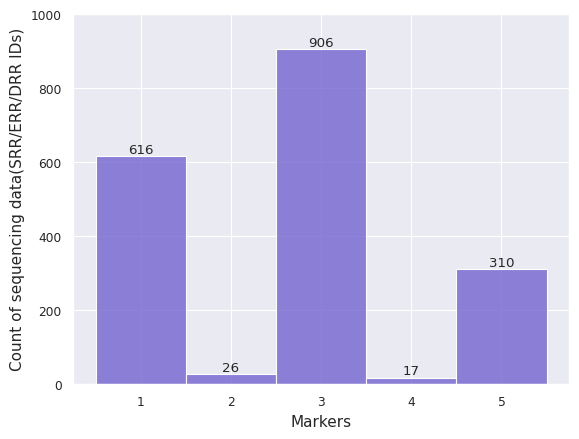

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
# Set style and context
sns.set_style("darkgrid")
sns.set_context("paper")

# Example data
time_pin = df_SRA_IDs_in_both["time_pin_1"]
# Manually specify the number of bins (5 in this case)
num_bins = 5
# Plot the histogram with the specified number of bins
ax = sns.histplot(data=time_pin, kde=False, color='slateblue', bins=num_bins)
# Set x-axis tick intervals and format
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
# Manually specified bin centers
bin_centers = [1.4, 2.2, 3.0, 3.8, 4.6]
ax.set_xticks(bin_centers)
ax.set_yticks(range(0,1001,200))

for p in ax.patches:
    # Place the text in the middle of the bar, slightly above the top
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom')

ax.set_xlabel('Markers',size=11)
ax.set_ylabel('Count of sequencing data(SRR/ERR/DRR IDs)',size=11)
plt.show()

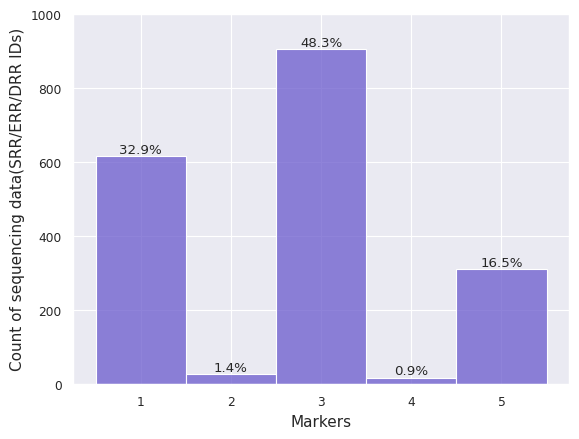

In [ ]:
# Set style and context
sns.set_style("darkgrid")
sns.set_context("paper")

# Example data
time_pin = df_SRA_IDs_in_both["time_pin_1"]  # Replace with your data
# Manually specify the number of bins (5 in this case)
num_bins = 5
# Plot the histogram with the specified number of bins
ax = sns.histplot(data=time_pin, kde=False, color='slateblue', bins=num_bins)
# Set x-axis tick intervals and format
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
# Manually specified bin centers
bin_centers = [1.4, 2.2, 3.0, 3.8, 4.6]
ax.set_xticks(bin_centers)
ax.set_yticks(range(0,1001,200))

total_count = 1875
for p in ax.patches:
    # Calculate the percentage
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    # Place the text in the middle of the bar, slightly above the top
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), percentage,
            ha='center', va='bottom')

ax.set_xlabel('Markers',size=11)
ax.set_ylabel('Count of sequencing data(SRR/ERR/DRR IDs)',size=11)
plt.show()

### Statistics on the time pin 1 (only in publications):

In [ ]:
print(len(df_SRA_IDs_only_in_pub))

2304


In [ ]:
count_list_only_in_pub = []
for x in range(1, 6):
    # Count how many times 'x' appears in the 'time_pin_1' column
    count_only_in_pub = df_SRA_IDs_only_in_pub[df_SRA_IDs_only_in_pub['time_pin_1'] == x].shape[0]
    count_list_only_in_pub.append(count_only_in_pub)

total_counts_only_in_pub = count_list_only_in_pub[0] + count_list_only_in_pub[1] + count_list_only_in_pub[2] + count_list_only_in_pub[3] + count_list_only_in_pub[4]

for x, count in enumerate(count_list_only_in_pub, start=1):
    percentage = count / total_counts_only_in_pub
    print(f"{x}: {count} ({percentage:.2%})")

1: 331 (14.37%)
2: 14 (0.61%)
3: 1737 (75.39%)
4: 21 (0.91%)
5: 201 (8.72%)


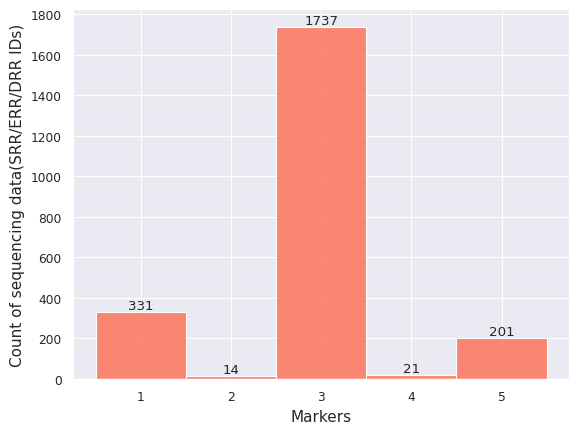

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Set style and context
sns.set_style("darkgrid")
sns.set_context("paper")

# Example data
time_pin = df_SRA_IDs_only_in_pub["time_pin_1"]
# Manually specify the number of bins (5 in this case)
num_bins = 5
# Plot the histogram with the specified number of bins
ax = sns.histplot(data=time_pin, kde=False, color='tomato', bins=num_bins)
# Set x-axis tick intervals and format
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
# Manually specified bin centers
bin_centers = [1.4, 2.2, 3.0, 3.8, 4.6]
ax.set_xticks(bin_centers)
ax.set_yticks(range(0,1801,200))

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()),
            ha='center', va='bottom')
ax.set_xlabel('Markers', size=11)
ax.set_ylabel('Count of sequencing data(SRR/ERR/DRR IDs)',size=11)
plt.show()

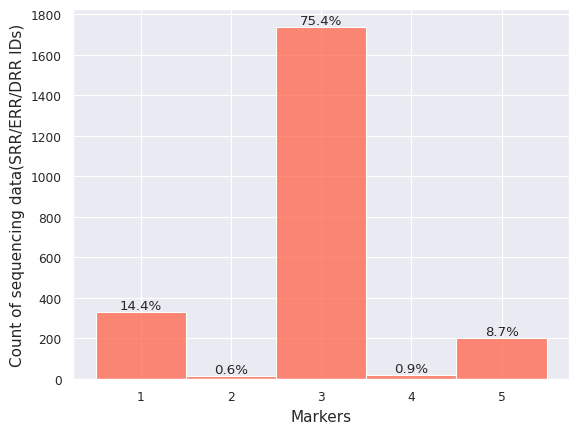

In [ ]:
# Set style and context
sns.set_style("darkgrid")
sns.set_context("paper")

# Example data
time_pin = df_SRA_IDs_only_in_pub["time_pin_1"]  # Replace with your data
# Manually specify the number of bins (5 in this case)
num_bins = 5
# Plot the histogram with the specified number of bins
ax = sns.histplot(data=time_pin, kde=False, color='tomato', bins=num_bins)
# Set x-axis tick intervals and format
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
# Manually specified bin centers
bin_centers = [1.4, 2.2, 3.0, 3.8, 4.6]
ax.set_xticks(bin_centers)
ax.set_yticks(range(0,1801,200))

total_count = 2304
for p in ax.patches:
    # Calculate the percentage
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    # Place the text in the middle of the bar, slightly above the top
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), percentage,
            ha='center', va='bottom')

ax.set_xlabel('Markers',size=11)
ax.set_ylabel('Count of sequencing data(SRR/ERR/DRR IDs)',size=11)
plt.show()

## Investigate the distribution of the time gaps between the release dates of sequencing data and the posting dates of corresponding preprints or publications

### SRA IDs mentioned in both preprints and publications

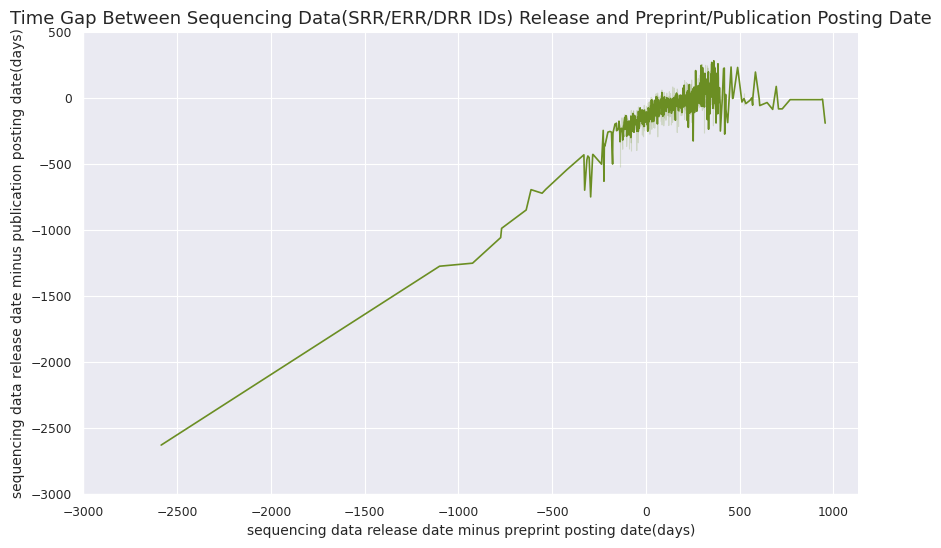

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
# Set style and context
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
color = "olivedrab"
sequencing_preprint = df_SRA_IDs_in_both['sequencing_availa_subtracts_preprint_posting']
sequencing_publication = df_SRA_IDs_in_both['sequencing_availa_subtracts_publication_posting']
ax=sns.lineplot(data = df_SRA_IDs_in_both, x = sequencing_preprint, y = sequencing_publication,color=color)
ax.set_xticks(range(-3000,1001,500))
ax.set_yticks(range(-3000,501,500))
sns.despine()
# Set the x-axis label
ax.set_xlabel('sequencing data release date minus preprint posting date(days)', size=10)
# Set the y-axis label
ax.set_ylabel('sequencing data release date minus publication posting date(days)', size=10)

ax.set_title('Time Gap Between Sequencing Data(SRR/ERR/DRR IDs) Release and Preprint/Publication Posting Date',size=13)
plt.show()

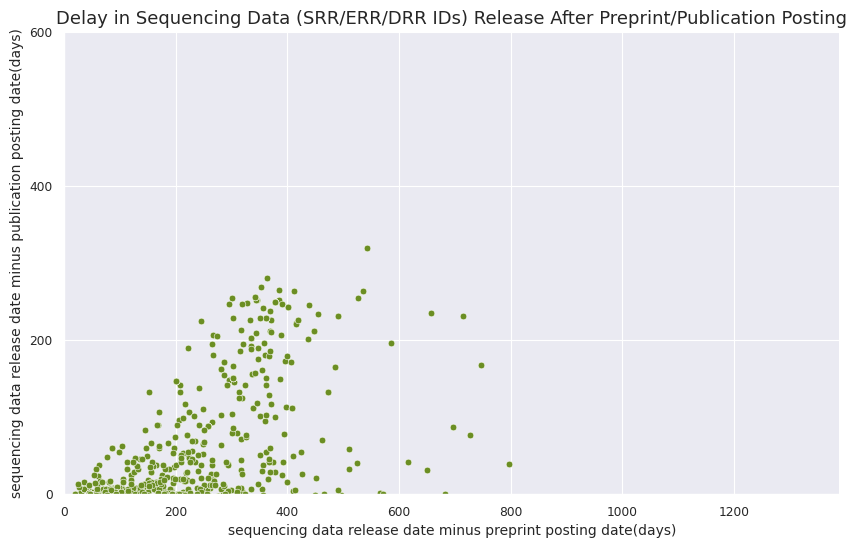

In [ ]:
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
color = "olivedrab"
sequencing_preprint=ultimate_df['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=ultimate_df['sequencing_availa_subtracts_publication_posting']
ax=sns.scatterplot(data=df_SRA_IDs_in_both, x=sequencing_preprint, y=sequencing_publication,color=color)
# Set the starting point of both axes to 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xticks(range(0,1201,200))
ax.set_yticks(range(0,601,200))
# Set the x-axis label
ax.set_xlabel('sequencing data release date minus preprint posting date(days)',size=10)
# Set the y-axis label
ax.set_ylabel('sequencing data release date minus publication posting date(days)',size=10)

ax.set_title('Delay in Sequencing Data (SRR/ERR/DRR IDs) Release After Preprint/Publication Posting',size=13)
sns.despine()

In [ ]:
sequencing_preprint = df_SRA_IDs_in_both['sequencing_availa_subtracts_preprint_posting']
sequencing_publication = df_SRA_IDs_in_both['sequencing_availa_subtracts_publication_posting']

How many dots are there in the figure:

In [ ]:
sequencing_data_later_than_in_total = df_SRA_IDs_in_both.loc[
    (ultimate_df['sequencing_availa_subtracts_publication_posting'] > 0) &
    (ultimate_df['sequencing_availa_subtracts_preprint_posting'] > 0)
]
print(len(sequencing_data_later_than_in_total))

310


Post-Publication delays fall within 200-day window; total number: 310

In [ ]:
print(sequencing_data_later_than_in_total.loc[sequencing_data_later_than_in_total['sequencing_availa_subtracts_publication_posting']<=200].shape[0])

267


Post-Preprint delays fall within 400-day window; total number: 310

In [ ]:
print(sequencing_data_later_than_in_total.loc[sequencing_data_later_than_in_total['sequencing_availa_subtracts_preprint_posting']<=400].shape[0])

299


In [ ]:
print(sequencing_data_later_than_in_total['sequencing_availa_subtracts_publication_posting'].mean())
print(sequencing_data_later_than_in_total['sequencing_availa_subtracts_publication_posting'].median())

print(sequencing_data_later_than_in_total['sequencing_availa_subtracts_preprint_posting'].mean())
print(sequencing_data_later_than_in_total['sequencing_availa_subtracts_preprint_posting'].median())

74.3
44.5
213.2774193548387
218.5


Check for distribution:

In [ ]:
sequencing_data_later_than_publication = df_SRA_IDs_in_both.loc[df_SRA_IDs_in_both['sequencing_availa_subtracts_publication_posting']>0]
sequencing_data_later_than_preprint = df_SRA_IDs_in_both.loc[df_SRA_IDs_in_both['sequencing_availa_subtracts_preprint_posting']>0]

<Axes: xlabel='sequencing_availa_subtracts_publication_posting', ylabel='Count'>

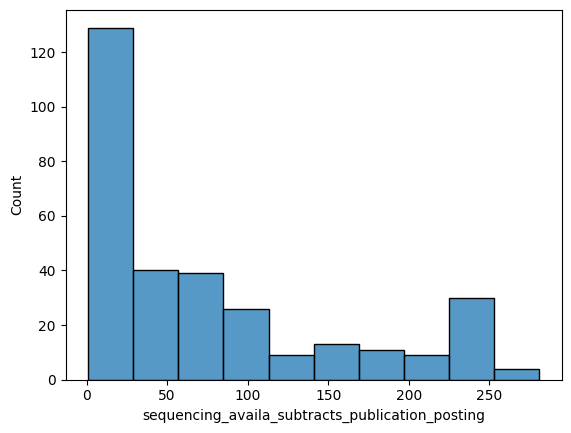

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_later_than_publication['sequencing_availa_subtracts_publication_posting'])

<Axes: xlabel='sequencing_availa_subtracts_preprint_posting', ylabel='Count'>

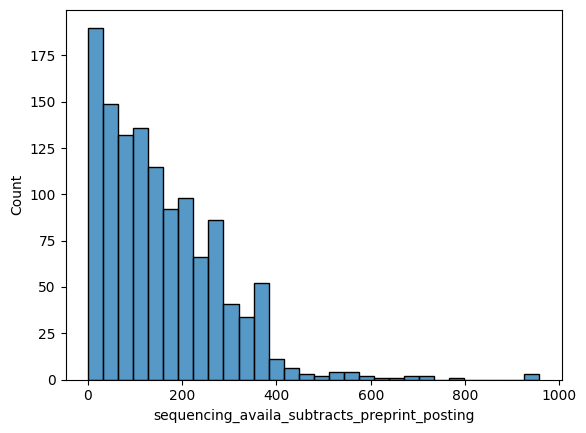

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_later_than_preprint['sequencing_availa_subtracts_preprint_posting'])

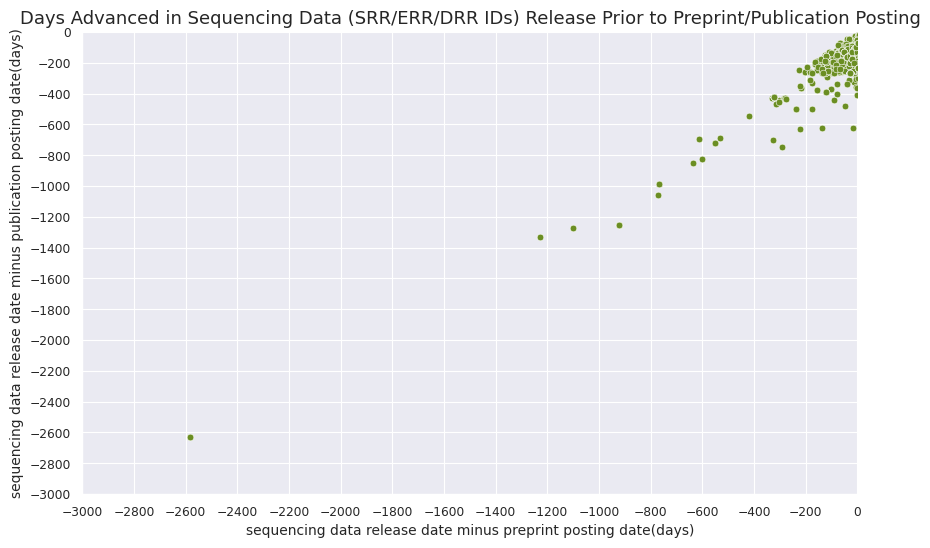

In [ ]:
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
color = "olivedrab"
sequencing_preprint=ultimate_df['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=ultimate_df['sequencing_availa_subtracts_publication_posting']
ax=sns.scatterplot(data=df_SRA_IDs_in_both, x=sequencing_preprint, y=sequencing_publication,color=color)
# Set the starting point of both axes to 0
ax.set_xlim(right=0)
ax.set_ylim(top=0)
ax.set_xticks(range(-3000,1,200))
ax.set_yticks(range(-3000,1,200))
# Set the x-axis label
ax.set_xlabel('sequencing data release date minus preprint posting date(days)',size=10)
# Set the y-axis label
ax.set_ylabel('sequencing data release date minus publication posting date(days)',size=10)

ax.set_title('Days Advanced in Sequencing Data (SRR/ERR/DRR IDs) Release Prior to Preprint/Publication Posting', size=13)
sns.despine()

How many dots are there in the figure:

In [ ]:
sequencing_data_earlier_than_in_total = df_SRA_IDs_in_both.loc[
    (df_SRA_IDs_in_both['sequencing_availa_subtracts_publication_posting'] < 0) &
    (df_SRA_IDs_in_both['sequencing_availa_subtracts_preprint_posting'] < 0)
]
print(len(sequencing_data_earlier_than_in_total))

616


Pre-Publication and Pre-Preprint data avaliability in advanced fall within 400-day window, 200 day window respectively; total number: 616

In [ ]:
within_early_window = sequencing_data_earlier_than_in_total.loc[
    (sequencing_data_earlier_than_in_total['sequencing_availa_subtracts_publication_posting'] >= -400) &
    (sequencing_data_earlier_than_in_total['sequencing_availa_subtracts_preprint_posting'] >= -200)
]
print(len(within_early_window))

569


In [ ]:
print(sequencing_data_earlier_than_in_total['sequencing_availa_subtracts_publication_posting'].mean())
print(sequencing_data_earlier_than_in_total['sequencing_availa_subtracts_publication_posting'].median())

print(sequencing_data_earlier_than_in_total['sequencing_availa_subtracts_preprint_posting'].mean())
print(sequencing_data_earlier_than_in_total['sequencing_availa_subtracts_preprint_posting'].median())

-213.15584415584416
-181.0
-76.0487012987013
-32.0


Check for distribution:

In [ ]:
sequencing_data_earlier_than_publication = df_SRA_IDs_in_both.loc[df_SRA_IDs_in_both['sequencing_availa_subtracts_publication_posting'] < 0]
sequencing_data_earlier_than_preprint = df_SRA_IDs_in_both.loc[df_SRA_IDs_in_both['sequencing_availa_subtracts_preprint_posting'] < 0]

<Axes: xlabel='sequencing_availa_subtracts_publication_posting', ylabel='Count'>

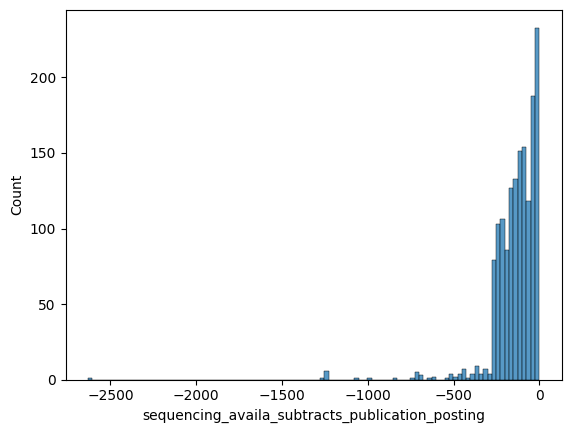

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_earlier_than_publication['sequencing_availa_subtracts_publication_posting'])

<Axes: xlabel='sequencing_availa_subtracts_preprint_posting', ylabel='Count'>

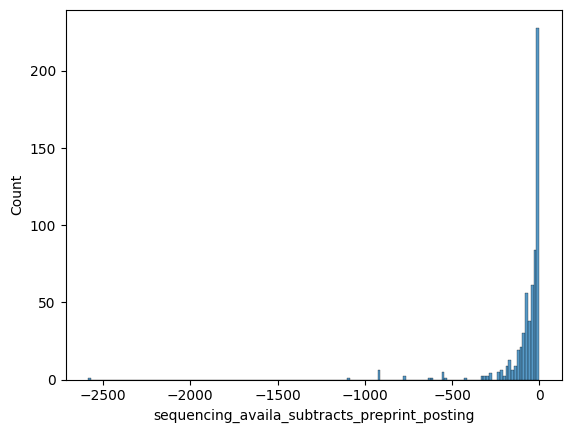

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_earlier_than_preprint['sequencing_availa_subtracts_preprint_posting'])

### SRA IDs mentioned only in publications

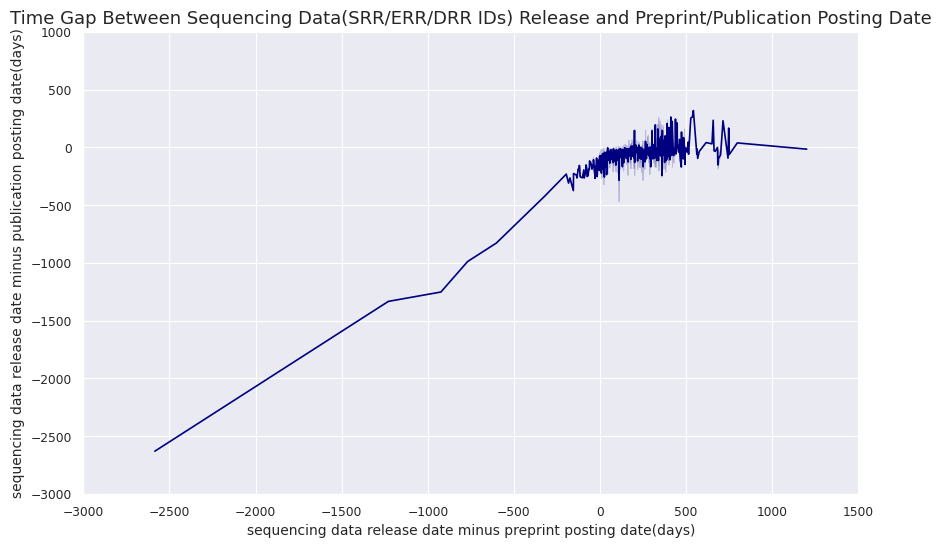

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd

sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
color = "navy"
sequencing_preprint=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting']
ax=sns.lineplot(data=df_SRA_IDs_only_in_pub, x=sequencing_preprint, y=sequencing_publication,color=color)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xticks(range(-3000,1501,500))
ax.set_yticks(range(-3000,1001,500))
sns.despine()
# Set the x-axis label
ax.set_xlabel('sequencing data release date minus preprint posting date(days)', size=10)
# Set the y-axis label
ax.set_ylabel('sequencing data release date minus publication posting date(days)', size=10)
ax.set_title('Time Gap Between Sequencing Data(SRR/ERR/DRR IDs) Release and Preprint/Publication Posting Date',size=13)
plt.show()

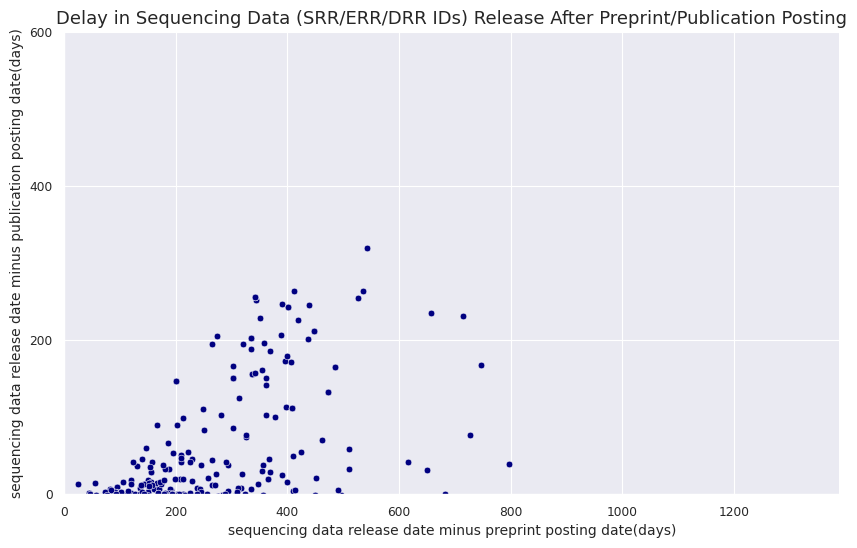

In [ ]:
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
color = "navy"
sequencing_preprint=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting']
ax=sns.scatterplot(data=df_SRA_IDs_only_in_pub, x=sequencing_preprint, y=sequencing_publication,color=color)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xticks(range(0,1201,200))
ax.set_yticks(range(0,601,200))
sns.despine()
# Set the x-axis label
ax.set_xlabel('sequencing data release date minus preprint posting date(days)', size=10)
# Set the y-axis label
ax.set_ylabel('sequencing data release date minus publication posting date(days)', size=10)
ax.set_title('Delay in Sequencing Data (SRR/ERR/DRR IDs) Release After Preprint/Publication Posting',size=13)
plt.show()

In [ ]:
sequencing_preprint=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting']

How many dots are there in the figure:

In [ ]:
sequencing_data_later_than_in_total2 = df_SRA_IDs_only_in_pub.loc[
    (df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting'] > 0) &
    (df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting'] > 0)
]
print(len(sequencing_data_later_than_in_total2))

201


Post-Publication delays fall within 200-day window; total number: 201

In [ ]:
print(sequencing_data_later_than_in_total2.loc[sequencing_data_later_than_in_total2['sequencing_availa_subtracts_publication_posting']<=200].shape[0])

175


Post-Preprint delays fall within 400-day window; total number: 201

In [ ]:
print(sequencing_data_later_than_in_total2.loc[sequencing_data_later_than_in_total2['sequencing_availa_subtracts_preprint_posting']<=400].shape[0])

161


In [ ]:
print(sequencing_data_later_than_in_total2['sequencing_availa_subtracts_publication_posting'].mean())
print(sequencing_data_later_than_in_total2['sequencing_availa_subtracts_publication_posting'].median())

print(sequencing_data_later_than_in_total2['sequencing_availa_subtracts_preprint_posting'].mean())
print(sequencing_data_later_than_in_total2['sequencing_availa_subtracts_preprint_posting'].median())

74.4726368159204
36.0
266.8955223880597
250.0


Check for distribution:

In [ ]:
sequencing_data_later_than_publication = df_SRA_IDs_only_in_pub.loc[df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting'] > 0]
sequencing_data_later_than_preprint = df_SRA_IDs_only_in_pub.loc[df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting'] > 0]

<Axes: xlabel='sequencing_availa_subtracts_publication_posting', ylabel='Count'>

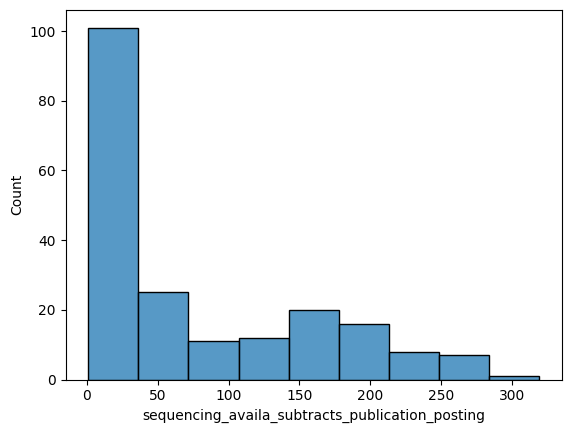

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_later_than_publication['sequencing_availa_subtracts_publication_posting'])

<Axes: xlabel='sequencing_availa_subtracts_preprint_posting', ylabel='Count'>

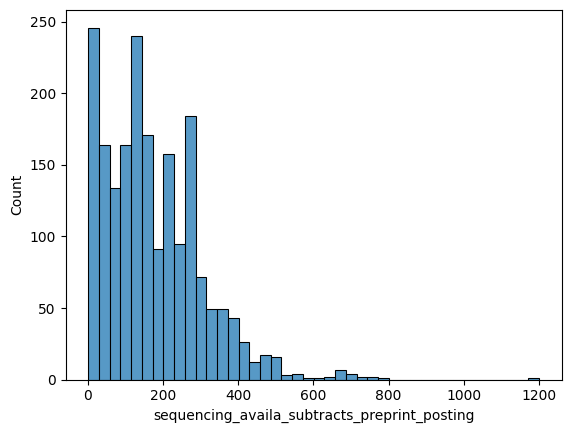

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_later_than_preprint['sequencing_availa_subtracts_preprint_posting'])

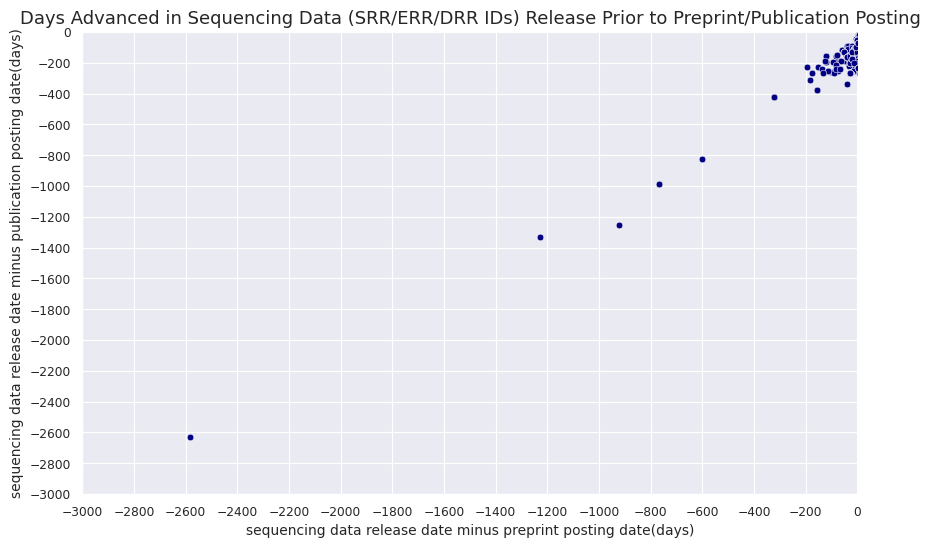

In [ ]:
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
color = "navy"
sequencing_preprint=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting']
ax=sns.scatterplot(data=df_SRA_IDs_only_in_pub, x=sequencing_preprint, y=sequencing_publication,color=color)
ax.set_xlim(right=0)
ax.set_ylim(top=0)
ax.set_xticks(range(-3000,1,200))
ax.set_yticks(range(-3000,1,200))
sns.despine()
# Set the x-axis label
ax.set_xlabel('sequencing data release date minus preprint posting date(days)', size=10)
# Set the y-axis label
ax.set_ylabel('sequencing data release date minus publication posting date(days)', size=10)
ax.set_title('Days Advanced in Sequencing Data (SRR/ERR/DRR IDs) Release Prior to Preprint/Publication Posting',size=13)
plt.show()

How many dots are there in the figure:

In [ ]:
sequencing_preprint=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting']
sequencing_publication=df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting']

In [ ]:
sequencing_data_earlier_than_in_total2 = df_SRA_IDs_only_in_pub.loc[
    (df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting'] < 0) &
    (df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting'] < 0)
]
print(len(sequencing_data_earlier_than_in_total2))

331


In [ ]:
within_early_window2 = sequencing_data_earlier_than_in_total2.loc[
    (sequencing_data_earlier_than_in_total2['sequencing_availa_subtracts_publication_posting'] >= -400) &
    (sequencing_data_earlier_than_in_total2['sequencing_availa_subtracts_preprint_posting'] >= -200)
]
print(len(within_early_window2))

299


Pre-Publication and Pre-Preprint data avaliability in advanced fall within 400-day window, 200 day window respectively; total number: 331

In [ ]:
print(sequencing_data_earlier_than_in_total2['sequencing_availa_subtracts_publication_posting'].mean())
print(sequencing_data_earlier_than_in_total2['sequencing_availa_subtracts_publication_posting'].median())

print(sequencing_data_earlier_than_in_total2['sequencing_availa_subtracts_preprint_posting'].mean())
print(sequencing_data_earlier_than_in_total2['sequencing_availa_subtracts_preprint_posting'].median())

-221.3595166163142
-181.0
-75.809667673716
-29.0


Check for distribution:

In [ ]:
sequencing_data_earlier_than_publication = df_SRA_IDs_only_in_pub.loc[df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_publication_posting'] < 0]
sequencing_data_earlier_than_preprint = df_SRA_IDs_only_in_pub.loc[df_SRA_IDs_only_in_pub['sequencing_availa_subtracts_preprint_posting'] < 0]

<Axes: xlabel='sequencing_availa_subtracts_publication_posting', ylabel='Count'>

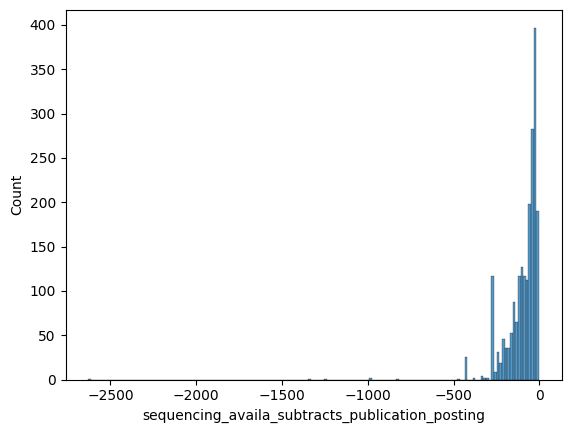

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_earlier_than_publication['sequencing_availa_subtracts_publication_posting'])

<Axes: xlabel='sequencing_availa_subtracts_preprint_posting', ylabel='Count'>

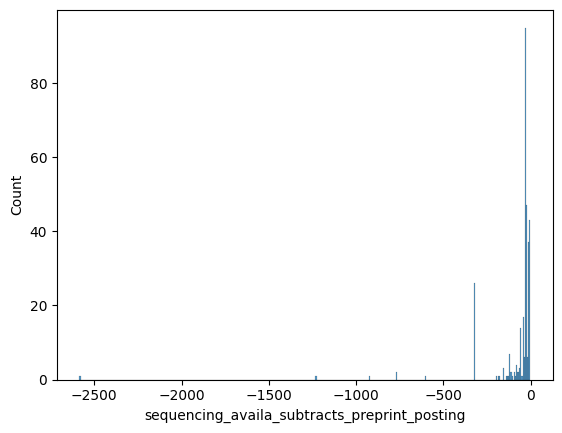

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=sequencing_data_earlier_than_preprint['sequencing_availa_subtracts_preprint_posting'])

### Delaying data avaliability relative to preprint/publication:

In [ ]:
selected_columns = ['Repository','Sharing Scenario','sequencing_availa_subtracts_preprint_posting','sequencing_availa_subtracts_publication_posting']
relations_SRA_repo = df_SRA_repo[selected_columns]
print(len(relations_SRA_repo))
relations_SRA_repo.head(3)

4179


,Repository,Sharing Scenario,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting
0,SRA,SRA IDs shared in both,-140.0,-218.0
1,SRA,SRA IDs shared in both,-9.0,-256.0
2,SRA,SRA IDs shared in both,-74.0,-202.0


In [ ]:
whole_sequencing_data_later_than_in_total = relations_SRA_repo.loc[
    (relations_SRA_repo['sequencing_availa_subtracts_publication_posting'] > 0) &
    (relations_SRA_repo['sequencing_availa_subtracts_preprint_posting'] > 0)
]
whole_sequencing_data_later_than_in_total.rename(columns={'sequencing_availa_subtracts_preprint_posting': 'Post-Preprint Data Avaliability', 'sequencing_availa_subtracts_publication_posting': 'Post-Publication Data Avaliability'}, inplace=True)
whole_sequencing_data_later_than_in_total

<ipython-input-52-8c4414ac7d95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_sequencing_data_later_than_in_total.rename(columns={'sequencing_availa_subtracts_preprint_posting': 'Post-Preprint Data Avaliability', 'sequencing_availa_subtracts_publication_posting': 'Post-Publication Data Avaliability'}, inplace=True)


,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability
6,SRA,SRA IDs shared in both,338.0,111.0
7,SRA,SRA IDs shared in both,338.0,111.0
10,SRA,SRA IDs shared in both,44.0,1.0
11,SRA,SRA IDs shared in both,301.0,254.0
15,SRA,SRA IDs shared in both,287.0,171.0
...,...,...,...,...
4102,SRA,SRA IDs shared only in pub,180.0,1.0
4158,SRA,SRA IDs shared only in pub,797.0,39.0
4160,SRA,SRA IDs shared only in pub,511.0,33.0
4161,SRA,SRA IDs shared only in pub,490.0,5.0


In [ ]:
whole_sequencing_data_later_than_in_total['Data Type']='Sequencing Data'

<ipython-input-53-de0ee87013d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_sequencing_data_later_than_in_total['Data Type']='Sequencing Data'


In [ ]:
whole_sequencing_data_later_than_in_total.to_csv("SRA_whole_sequencing_data_later_than_in_total.csv")

We defined extreme delays as instances where data were available delayed by more than 600 days relative to preprint posting and 400 days relative to publication posting.

Number of Outliers:

In [ ]:
outliers_of_delaying = whole_sequencing_data_later_than_in_total.loc[(whole_sequencing_data_later_than_in_total['Post-Preprint Data Avaliability'] > 600) | (whole_sequencing_data_later_than_in_total['Post-Publication Data Avaliability'] > 400)]
print(len(outliers_of_delaying))

8


In [ ]:
outliers_of_delaying

,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability,Data Type
726,SRA,SRA IDs shared in both,696.0,87.0,Sequencing Data
2187,SRA,SRA IDs shared only in pub,728.0,77.0,Sequencing Data
2856,SRA,SRA IDs shared only in pub,747.0,167.0,Sequencing Data
2879,SRA,SRA IDs shared only in pub,650.0,31.0,Sequencing Data
3468,SRA,SRA IDs shared only in pub,616.0,42.0,Sequencing Data
3608,SRA,SRA IDs shared only in pub,714.0,231.0,Sequencing Data
3787,SRA,SRA IDs shared only in pub,657.0,235.0,Sequencing Data
4158,SRA,SRA IDs shared only in pub,797.0,39.0,Sequencing Data


In [ ]:
whole_sequencing_data_later_than_in_total['CV'] = whole_sequencing_data_later_than_in_total.groupby(['Sharing Scenario'])['Post-Publication Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)
whole_sequencing_data_later_than_in_total

<ipython-input-57-ef27bb616394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_sequencing_data_later_than_in_total['CV'] = whole_sequencing_data_later_than_in_total.groupby(['Sharing Scenario'])['Post-Publication Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)


,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability,Data Type,CV
6,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data,108.901233
7,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data,108.901233
10,SRA,SRA IDs shared in both,44.0,1.0,Sequencing Data,108.901233
11,SRA,SRA IDs shared in both,301.0,254.0,Sequencing Data,108.901233
15,SRA,SRA IDs shared in both,287.0,171.0,Sequencing Data,108.901233
...,...,...,...,...,...,...
4102,SRA,SRA IDs shared only in pub,180.0,1.0,Sequencing Data,111.327638
4158,SRA,SRA IDs shared only in pub,797.0,39.0,Sequencing Data,111.327638
4160,SRA,SRA IDs shared only in pub,511.0,33.0,Sequencing Data,111.327638
4161,SRA,SRA IDs shared only in pub,490.0,5.0,Sequencing Data,111.327638


In [ ]:
cv_values = whole_sequencing_data_later_than_in_total[['Sharing Scenario','CV']].drop_duplicates().reset_index(drop=True)
print(cv_values)

             Sharing Scenario          CV
0      SRA IDs shared in both  108.901233
1  SRA IDs shared only in pub  111.327638


### Data avaliability in advanced than preprint/publication:

In [ ]:
whole_sequencing_data_earlier_than_in_total = relations_SRA_repo.loc[
    (relations_SRA_repo['sequencing_availa_subtracts_publication_posting'] < 0) &
    (relations_SRA_repo['sequencing_availa_subtracts_preprint_posting'] < 0)
]
whole_sequencing_data_earlier_than_in_total.rename(columns={'sequencing_availa_subtracts_preprint_posting': 'Pre-Preprint Data Avaliability', 'sequencing_availa_subtracts_publication_posting': 'Pre-Publication Data Avaliability'}, inplace=True)
whole_sequencing_data_earlier_than_in_total

<ipython-input-75-6c85e59c3f2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_sequencing_data_earlier_than_in_total.rename(columns={'sequencing_availa_subtracts_preprint_posting': 'Pre-Preprint Data Avaliability', 'sequencing_availa_subtracts_publication_posting': 'Pre-Publication Data Avaliability'}, inplace=True)


,Repository,Sharing Scenario,Pre-Preprint Data Avaliability,Pre-Publication Data Avaliability
0,SRA,SRA IDs shared in both,-140.0,-218.0
1,SRA,SRA IDs shared in both,-9.0,-256.0
2,SRA,SRA IDs shared in both,-74.0,-202.0
5,SRA,SRA IDs shared in both,-43.0,-98.0
12,SRA,SRA IDs shared in both,-81.0,-201.0
...,...,...,...,...
4108,SRA,SRA IDs shared only in pub,-13.0,-201.0
4112,SRA,SRA IDs shared only in pub,-134.0,-265.0
4113,SRA,SRA IDs shared only in pub,-127.0,-187.0
4174,SRA,SRA IDs shared in both,-177.0,-501.0


In [ ]:
whole_sequencing_data_earlier_than_in_total['Data Type']='Sequencing Data'

<ipython-input-76-20b22b570a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_sequencing_data_earlier_than_in_total['Data Type']='Sequencing Data'


In [ ]:
whole_sequencing_data_earlier_than_in_total.to_csv("SRA_whole_sequencing_data_earlier_than_in_total.csv")

Conversely, we categorized extremely advanced availability as cases where data were accessible more than 400 days prior to publication posting dates and 600 days prior to preprint posting dates.

Number of Outliers:

In [ ]:
outliers_of_in_advanced = whole_sequencing_data_earlier_than_in_total.loc[(whole_sequencing_data_earlier_than_in_total['Pre-Preprint Data Avaliability'] < -600) | (whole_sequencing_data_earlier_than_in_total['Pre-Publication Data Avaliability'] < -400)]
print(len(outliers_of_in_advanced))

71


In [ ]:
print(outliers_of_in_advanced.loc[outliers_of_in_advanced['Sharing Scenario']=='SRA IDs shared in both'].shape[0])
print(outliers_of_in_advanced.loc[outliers_of_in_advanced['Sharing Scenario']=='SRA IDs shared only in pub'].shape[0])

39
32


In [ ]:
whole_sequencing_data_earlier_than_in_total['CV'] = whole_sequencing_data_earlier_than_in_total.groupby(['Sharing Scenario'])['Pre-Publication Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)
whole_sequencing_data_earlier_than_in_total

<ipython-input-80-c483af89d742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_sequencing_data_earlier_than_in_total['CV'] = whole_sequencing_data_earlier_than_in_total.groupby(['Sharing Scenario'])['Pre-Publication Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)


,Repository,Sharing Scenario,Pre-Preprint Data Avaliability,Pre-Publication Data Avaliability,Data Type,CV
0,SRA,SRA IDs shared in both,-140.0,-218.0,Sequencing Data,-90.352443
1,SRA,SRA IDs shared in both,-9.0,-256.0,Sequencing Data,-90.352443
2,SRA,SRA IDs shared in both,-74.0,-202.0,Sequencing Data,-90.352443
5,SRA,SRA IDs shared in both,-43.0,-98.0,Sequencing Data,-90.352443
12,SRA,SRA IDs shared in both,-81.0,-201.0,Sequencing Data,-90.352443
...,...,...,...,...,...,...
4108,SRA,SRA IDs shared only in pub,-13.0,-201.0,Sequencing Data,-88.890220
4112,SRA,SRA IDs shared only in pub,-134.0,-265.0,Sequencing Data,-88.890220
4113,SRA,SRA IDs shared only in pub,-127.0,-187.0,Sequencing Data,-88.890220
4174,SRA,SRA IDs shared in both,-177.0,-501.0,Sequencing Data,-90.352443


In [ ]:
cv_values2 = whole_sequencing_data_earlier_than_in_total[['Sharing Scenario','CV']].drop_duplicates().reset_index(drop=True)
print(cv_values2)

             Sharing Scenario         CV
0      SRA IDs shared in both -90.352443
1  SRA IDs shared only in pub -88.890220


### Full analysis of SRA and GEO

In [ ]:
SRA_whole_sequencing_data_later_than_in_total = pd.read_csv("SRA_whole_sequencing_data_later_than_in_total.csv")
GEO_whole_data_later_than = pd.read_csv("GEO_whole_data_later_than.csv")
SRA_whole_sequencing_data_later_than_in_total.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability,Data Type
0,6,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data
1,7,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data
2,10,SRA,SRA IDs shared in both,44.0,1.0,Sequencing Data


In [ ]:
GEO_whole_data_later_than.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability,Data Type
0,0,GEO,GSE IDs in both,406.0,307.0,Sequencing Data
1,1,GEO,GSE IDs in both,338.0,111.0,Sequencing Data
2,2,GEO,GSE IDs in both,214.0,105.0,Sequencing Data


In [ ]:
full_analysis = pd.concat([SRA_whole_sequencing_data_later_than_in_total,GEO_whole_data_later_than], ignore_index=True)
full_analysis.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability,Data Type
0,6,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data
1,7,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data
2,10,SRA,SRA IDs shared in both,44.0,1.0,Sequencing Data


In [ ]:
full_analysis_only_sequencing = full_analysis.loc[full_analysis['Data Type']=='Sequencing Data']
print(len(full_analysis_only_sequencing))

1283


In [ ]:
full_analysis_only_sequencing['CV'] = full_analysis_only_sequencing.groupby(['Repository'])['Post-Publication Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)
full_analysis_only_sequencing

<ipython-input-72-b3288e5040ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis_only_sequencing['CV'] = full_analysis_only_sequencing.groupby(['Repository'])['Post-Publication Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)


,Unnamed: 0,Repository,Sharing Scenario,Post-Preprint Data Avaliability,Post-Publication Data Avaliability,Data Type,CV
0,6,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data,109.755980
1,7,SRA,SRA IDs shared in both,338.0,111.0,Sequencing Data,109.755980
2,10,SRA,SRA IDs shared in both,44.0,1.0,Sequencing Data,109.755980
3,11,SRA,SRA IDs shared in both,301.0,254.0,Sequencing Data,109.755980
4,15,SRA,SRA IDs shared in both,287.0,171.0,Sequencing Data,109.755980
...,...,...,...,...,...,...,...
1278,767,GEO,GSE IDs only in pub,118.0,1.0,Sequencing Data,289.443018
1279,768,GEO,GSE IDs only in pub,146.0,22.0,Sequencing Data,289.443018
1280,769,GEO,GSE IDs only in pub,272.0,49.0,Sequencing Data,289.443018
1281,770,GEO,GSE IDs only in pub,336.0,17.0,Sequencing Data,289.443018


In [ ]:
cv_values_full = full_analysis_only_sequencing[['CV','Repository']].drop_duplicates().reset_index(drop=True)
print(cv_values_full)

           CV Repository
0  109.755980        SRA
1  289.443018        GEO


In [ ]:
full_analysis_only_sequencing.groupby(['Repository'])['Post-Publication Data Avaliability'].describe()

,count,mean,std,min,25%,50%,75%,max
Repository,,,,,,,,
GEO,772.0,43.358808,125.499043,1.0,5.0,13.0,31.25,1749.0
SRA,511.0,74.367906,81.623224,1.0,7.0,41.0,126.00,319.0


### Full Analysis of Pre-Preprint Data avaliability, for SRA and GEO

In [ ]:
SRA_whole_sequencing_data_earlier_than_in_total = pd.read_csv('SRA_whole_sequencing_data_earlier_than_in_total.csv')
GEO_whole_data_earlier_than = pd.read_csv('GEO_whole_data_earlier_than.csv')

SRA_whole_sequencing_data_earlier_than_in_total.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Pre-Preprint Data Avaliability,Pre-Publication Data Avaliability,Data Type
0,0,SRA,SRA IDs shared in both,-140.0,-218.0,Sequencing Data
1,1,SRA,SRA IDs shared in both,-9.0,-256.0,Sequencing Data
2,2,SRA,SRA IDs shared in both,-74.0,-202.0,Sequencing Data


In [ ]:
GEO_whole_data_earlier_than.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Pre-Preprint Data Avaliability,Pre-Publication Data Avaliability,Data Type
0,0,GEO,GSE IDs in both,-28.0,-145.0,Sequencing Data
1,1,GEO,GSE IDs in both,-157.0,-253.0,Sequencing Data
2,2,GEO,GSE IDs in both,-40.0,-100.0,Sequencing Data


In [ ]:
earlier_full_analysis = pd.concat([SRA_whole_sequencing_data_earlier_than_in_total,GEO_whole_data_earlier_than], ignore_index=True)
print(len(earlier_full_analysis))

1581


In [ ]:
earlier_full_analysis.head(3)

,Unnamed: 0,Repository,Sharing Scenario,Pre-Preprint Data Avaliability,Pre-Publication Data Avaliability,Data Type
0,0,SRA,SRA IDs shared in both,-140.0,-218.0,Sequencing Data
1,1,SRA,SRA IDs shared in both,-9.0,-256.0,Sequencing Data
2,2,SRA,SRA IDs shared in both,-74.0,-202.0,Sequencing Data


In [ ]:
earlier_full_analysis_only_sequencing = earlier_full_analysis.loc[earlier_full_analysis['Data Type']=='Sequencing Data']
print(len(earlier_full_analysis_only_sequencing))

1221


In [ ]:
earlier_full_analysis_only_sequencing['CV'] = earlier_full_analysis_only_sequencing.groupby(['Repository'])['Pre-Preprint Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)
earlier_full_analysis_only_sequencing_check_for_repositories = earlier_full_analysis_only_sequencing
earlier_full_analysis_only_sequencing_check_for_repositories

<ipython-input-101-1093a52a2c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earlier_full_analysis_only_sequencing['CV'] = earlier_full_analysis_only_sequencing.groupby(['Repository'])['Pre-Preprint Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)


,Unnamed: 0,Repository,Sharing Scenario,Pre-Preprint Data Avaliability,Pre-Publication Data Avaliability,Data Type,CV
0,0,SRA,SRA IDs shared in both,-140.0,-218.0,Sequencing Data,-231.645151
1,1,SRA,SRA IDs shared in both,-9.0,-256.0,Sequencing Data,-231.645151
2,2,SRA,SRA IDs shared in both,-74.0,-202.0,Sequencing Data,-231.645151
3,5,SRA,SRA IDs shared in both,-43.0,-98.0,Sequencing Data,-231.645151
4,12,SRA,SRA IDs shared in both,-81.0,-201.0,Sequencing Data,-231.645151
...,...,...,...,...,...,...,...
1216,269,GEO,GSE IDs only in pub,-44.0,-207.0,Sequencing Data,-198.854347
1217,270,GEO,GSE IDs only in pub,-10.0,-263.0,Sequencing Data,-198.854347
1218,271,GEO,GSE IDs only in pub,-128.0,-253.0,Sequencing Data,-198.854347
1219,272,GEO,GSE IDs only in pub,-6.0,-67.0,Sequencing Data,-198.854347


In [ ]:
cv_values_full1 = earlier_full_analysis_only_sequencing_check_for_repositories[['CV','Repository']].drop_duplicates().reset_index(drop=True)
print(cv_values_full1)

           CV Repository
0 -231.645151        SRA
1 -198.854347        GEO


In [ ]:
earlier_full_analysis_only_sequencing['CV'] = earlier_full_analysis_only_sequencing.groupby(['Repository','Sharing Scenario'])['Pre-Preprint Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)
earlier_full_analysis_only_sequencing_check_for_all_scenarios = earlier_full_analysis_only_sequencing

<ipython-input-103-fa9a02a1cb7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earlier_full_analysis_only_sequencing['CV'] = earlier_full_analysis_only_sequencing.groupby(['Repository','Sharing Scenario'])['Pre-Preprint Data Avaliability'].transform(lambda x: (x.std() / x.mean()) * 100)


In [ ]:
cv_values_full2 = earlier_full_analysis_only_sequencing_check_for_all_scenarios[['CV','Repository','Sharing Scenario']].drop_duplicates().reset_index(drop=True)
print(cv_values_full2)

           CV Repository            Sharing Scenario
0 -220.361733        SRA      SRA IDs shared in both
1 -251.767645        SRA  SRA IDs shared only in pub
2 -192.389491        GEO             GSE IDs in both
3 -104.139120        GEO         GSE IDs only in pub


In [ ]:
earlier_full_analysis_only_sequencing.groupby(['Repository','Sharing Scenario'])['Pre-Preprint Data Avaliability'].describe()

count        mean         std     min  \
Repository Sharing Scenario                                                    
GEO        GSE IDs in both             237.0 -182.974684  352.024062 -2395.0   
           GSE IDs only in pub          37.0  -59.810811   62.286452  -230.0   
SRA        SRA IDs shared in both      616.0  -76.048701  167.582236 -2585.0   
           SRA IDs shared only in pub  331.0  -75.809668  190.864215 -2585.0   

                                          25%   50%   75%  max  
Repository Sharing Scenario                                     
GEO        GSE IDs in both            -174.00 -32.0  -7.0 -1.0  
           GSE IDs only in pub         -77.00 -37.0 -12.0 -1.0  
SRA        SRA IDs shared in both      -77.25 -32.0  -9.0 -1.0  
           SRA IDs shared only in pub  -40.00 -29.0 -18.0 -1.0

# The third section: Relation between number of citations of a study and data sharing situation:

## Only pick out two columns from each file:
1. Categorical data: column - "time_pin_1"
2. Continuous data: column - "number_of_citations"

## And then make a sort of values in the number of citations column, to check the distribution of data

In [14]:
import pandas as pd
import statistics

df_SRA_repo = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations.csv", index_col=False, encoding='utf-8')
selected_columns = ['time_pin_1','number_of_citations']

relations_SRA_repo = df_SRA_repo[selected_columns]

list_of_number_of_citations_SRA_repo = relations_SRA_repo['number_of_citations'].tolist()
list_new_SRA_repo = sorted(list_of_number_of_citations_SRA_repo)
print(list_new_SRA_repo)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [15]:
relations_SRA_repo['time_pin_1'] = relations_SRA_repo['time_pin_1'].astype(int)
relations_SRA_repo.head(3)

<ipython-input-15-664eeb6299d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relations_SRA_repo['time_pin_1'] = relations_SRA_repo['time_pin_1'].astype(int)


,time_pin_1,number_of_citations
0,1,94
1,1,124
2,1,96


##Calculating mean and median values of number of citations under each categories ***with outliers***:

In [ ]:
category_1 = relations_SRA_repo.loc[relations_SRA_repo['time_pin_1']==1]
category_2 = relations_SRA_repo.loc[relations_SRA_repo['time_pin_1']==2]
category_3 = relations_SRA_repo.loc[relations_SRA_repo['time_pin_1']==3]
category_4 = relations_SRA_repo.loc[relations_SRA_repo['time_pin_1']==4]
category_5 = relations_SRA_repo.loc[relations_SRA_repo['time_pin_1']==5]

def calculation(which_category):
    mean_citations = which_category['number_of_citations'].mean()
    median_citations = which_category['number_of_citations'].median()
    return f"Mean number of citations: {mean_citations}; Median number of citations: {median_citations}"

# Store each category DataFrame in a dictionary for easier access
categories = {
    1: category_1,
    2: category_2,
    3: category_3,
    4: category_4,
    5: category_5
}

# Dictionary to store the results
results = {}

# Iterate over each category and store the results in the results dictionary
for i in range(1, 6):
    results[i] = calculation(categories[i])
    print(results[i])

Mean number of citations: 25.405491024287223; Median number of citations: 14.0
Mean number of citations: 23.075; Median number of citations: 20.0
Mean number of citations: 36.04767309875142; Median number of citations: 16.0
Mean number of citations: 33.18421052631579; Median number of citations: 12.0
Mean number of citations: 32.6105675146771; Median number of citations: 15.0


Check Distribution

<Axes: xlabel='number_of_citations', ylabel='Count'>

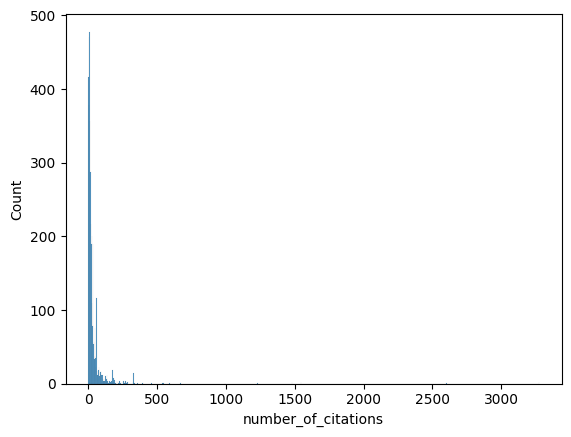

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=relations_SRA_repo['number_of_citations'])

<font color='yellow'>**Apply Kruskal-Wallis H Test test**

Null Hypothesis (H0): The distribution of citation counts is the same across all groups. This implies that the medians of the groups are equal.


Alternative Hypothesis (H1): The distribution of citation counts is not the same for at least one of the groups. This implies that at least one group median is different from the others.

## Draw a barplot to see mean value of number of citations within these categories:

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(category_1['number_of_citations'],category_2['number_of_citations'],category_3['number_of_citations'],category_4['number_of_citations'],category_5['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 39.2016528953167
p-value: 6.329273699155979e-08
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


<ipython-input-45-aeab7d7d47ee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=relations_SRA_repo, x='time_pin_1', y='number_of_citations', palette="pastel",estimator='mean',errorbar=None)


Text(0, 0.5, 'Number of citations(Mean)')

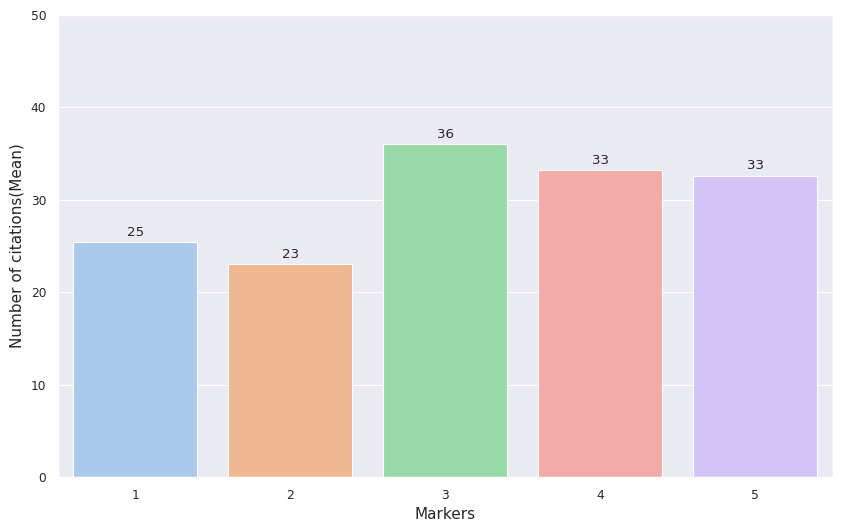

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=relations_SRA_repo, x='time_pin_1', y='number_of_citations', palette="pastel",estimator='mean',errorbar=None)
# Add numbers above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # Format the number
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
                ha = 'center',   # Center alignment
                va = 'center',   # Center vertical alignment
                xytext = (0, 7),  # Text position offset
                textcoords = 'offset points')  # How to interpret the text position

ax.set_yticks(range(0,51,10))
plt.xlabel("Markers",size=11)
plt.ylabel("Number of citations(Mean)",size=11)

## Draw a violinplot to see distribution of number of citations within these categories:

Text(0, 0.5, 'Number of citations')

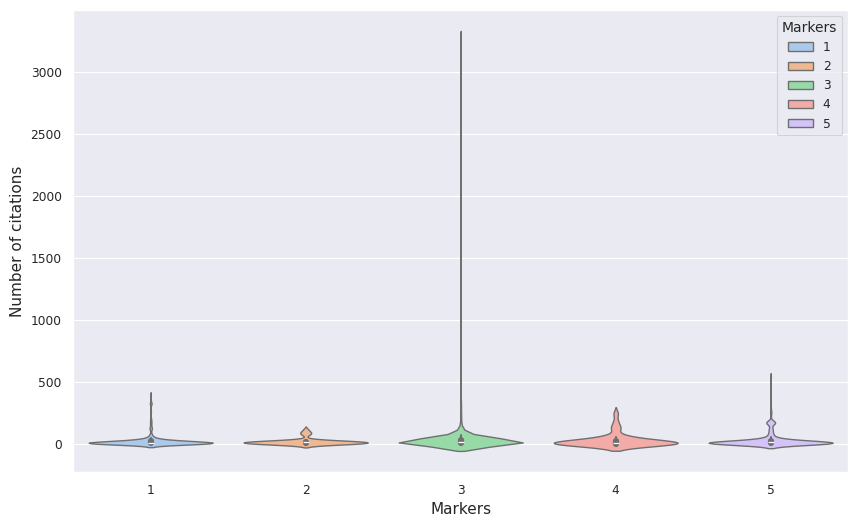

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=relations_SRA_repo, x='time_pin_1', y='number_of_citations', hue ='time_pin_1', palette="pastel")
ax.legend(loc='upper right', bbox_to_anchor=(1.0,1.0), title='Markers', title_fontsize=10)
plt.xlabel("Markers",size=11)
plt.ylabel("Number of citations",size=11)

### Statistical Test for both two repositories:

In [24]:
import pandas as pd
import statistics

df_1799_in_both = pd.read_csv('1799_GSE_IDs_mentioned_in_both.csv')
df_1636_only_in_pub = pd.read_csv('1636_GSE_IDs_mentioned_only_in_pub.csv')
selected_columns = ['time_pin_2','number_of_citations']

relation1 = df_1799_in_both[selected_columns]
relation2 = df_1636_only_in_pub[selected_columns]
relations_GSE_repo = pd.concat([relation1,relation2], ignore_index=True)

list_of_number_of_citations_GSE_repo = relations_GSE_repo['number_of_citations'].tolist()
list_new_GSE_repo = sorted(list_of_number_of_citations_GSE_repo)
print(list_new_GSE_repo)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [25]:
relations_GSE_repo['Which_Repo'] = 'GEO'
relations_GSE_repo.rename(columns={'time_pin_2': 'time_pin_1'}, inplace=True)

relations_SRA_repo['Which_Repo'] = 'SRA'

relations_whole_repo = pd.concat([relations_GSE_repo,relations_SRA_repo], ignore_index=True)
relations_whole_repo.rename(columns={'time_pin_1': 'Marker'}, inplace=True)

<ipython-input-25-8d338e4ddcb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relations_SRA_repo['Which_Repo'] = 'SRA'


In [26]:
print(len(relations_whole_repo))

7614


Statistical test within each data sharing categories, but across two repositories, with outliers:

In [27]:
relations_whole_repo

,Marker,number_of_citations,Which_Repo
0,3,187,GEO
1,1,169,GEO
2,3,65,GEO
3,5,92,GEO
4,3,15,GEO
...,...,...,...
7609,1,9,SRA
7610,3,13,SRA
7611,3,5,SRA
7612,1,57,SRA


time pin 1:

In [31]:
marker_1_sra = relations_whole_repo.loc[(relations_whole_repo['Marker']==1) & (relations_whole_repo['Which_Repo']=='SRA')]
marker_1_gse = relations_whole_repo.loc[(relations_whole_repo['Marker']==1) & (relations_whole_repo['Which_Repo']=='GEO')]

In [32]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_1_sra['number_of_citations'],marker_1_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 1.3414838391394102
p-value: 0.24677245964296052
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


time pin 2:

In [33]:
marker_2_sra = relations_whole_repo.loc[(relations_whole_repo['Marker']==2) & (relations_whole_repo['Which_Repo']=='SRA')]
marker_2_gse = relations_whole_repo.loc[(relations_whole_repo['Marker']==2) & (relations_whole_repo['Which_Repo']=='GEO')]

In [34]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_2_sra['number_of_citations'],marker_2_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 3.343269488585003
p-value: 0.06748039941287562
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


time pin 3:

In [35]:
marker_3_sra = relations_whole_repo.loc[(relations_whole_repo['Marker']==3) & (relations_whole_repo['Which_Repo']=='SRA')]
marker_3_gse = relations_whole_repo.loc[(relations_whole_repo['Marker']==3) & (relations_whole_repo['Which_Repo']=='GEO')]

stat, p = stats.kruskal(marker_3_sra['number_of_citations'],marker_3_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 16.4847865383909
p-value: 4.904201433834462e-05
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


time pin 4:

In [36]:
marker_4_sra = relations_whole_repo.loc[(relations_whole_repo['Marker']==4) & (relations_whole_repo['Which_Repo']=='SRA')]
marker_4_gse = relations_whole_repo.loc[(relations_whole_repo['Marker']==4) & (relations_whole_repo['Which_Repo']=='GEO')]

stat, p = stats.kruskal(marker_4_sra['number_of_citations'],marker_4_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 7.364449173424145
p-value: 0.006652597611482065
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


time pin 5:

In [37]:
marker_5_sra = relations_whole_repo.loc[(relations_whole_repo['Marker']==5) & (relations_whole_repo['Which_Repo']=='SRA')]
marker_5_gse = relations_whole_repo.loc[(relations_whole_repo['Marker']==5) & (relations_whole_repo['Which_Repo']=='GEO')]

stat, p = stats.kruskal(marker_5_sra['number_of_citations'],marker_5_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 3.110803034193268
p-value: 0.07777460555194887
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


## Draw a boxplot to include both distributions of markers associated with GSE IDs and SRA IDs, ***remove outliers***

Text(0, 0.5, 'Number of citations')

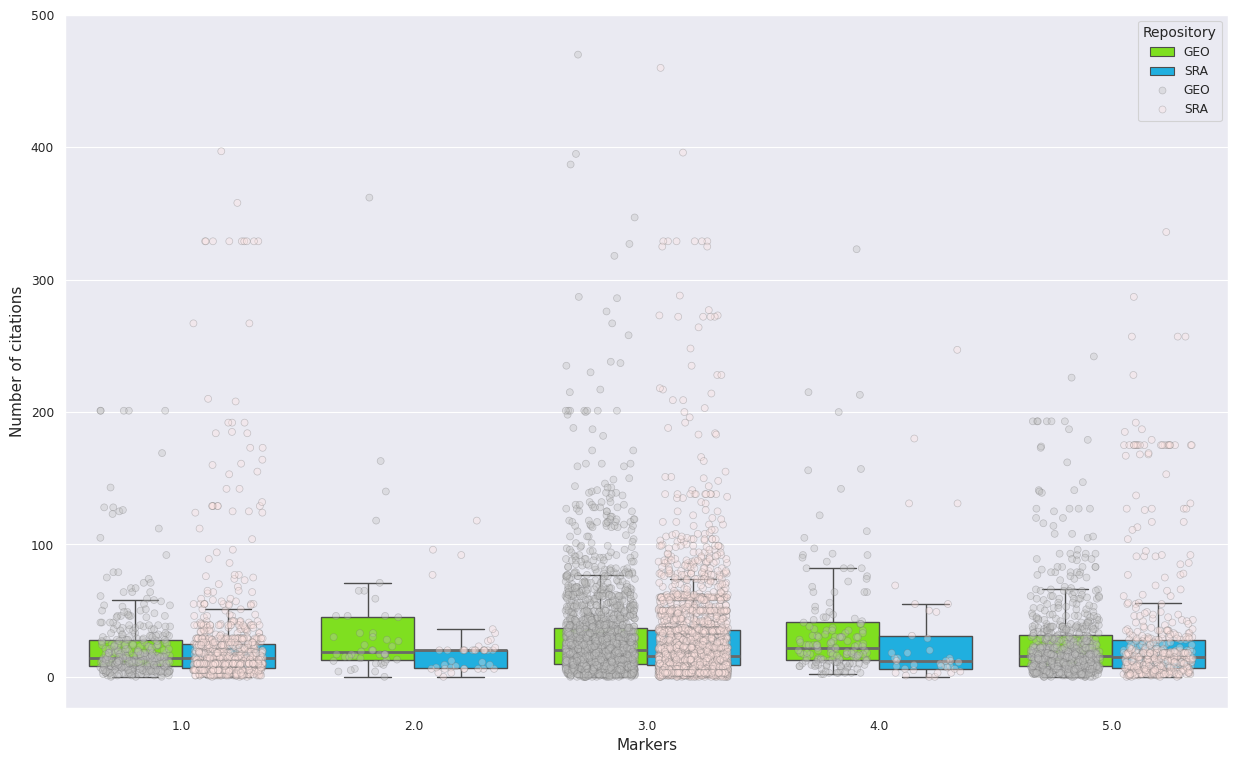

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")
color=['chartreuse','deepskyblue']
strip_colors = ['silver', 'mistyrose']
relations_whole_repo_without_outliers = relations_whole_repo[relations_whole_repo['number_of_citations'] <= 500]
plt.figure(figsize=(15, 9))
ax = sns.boxplot(data=relations_whole_repo_without_outliers, x='time_pin_1', y='number_of_citations', hue ='Which_Repo', palette=color, showfliers=False,medianprops={'color':'dimgrey', 'linewidth':2})
ax = sns.stripplot(data=relations_whole_repo_without_outliers, x='time_pin_1', y='number_of_citations', hue='Which_Repo', dodge=True, jitter=0.3, alpha=0.35, linewidth=0.5,palette=strip_colors)
ax.legend(loc='upper right', bbox_to_anchor=(1.0,1.0), title='Repository', title_fontsize=10)
ax.set_yticks(range(0,501,100))
plt.xlabel("Markers",size=11)
plt.ylabel("Number of citations",size=11)

In [ ]:
print(relations_whole_repo_without_outliers.groupby(['time_pin_1', 'Which_Repo'])['number_of_citations'].describe())

                        count       mean        std  min    25%   50%   75%  \
time_pin_1 Which_Repo                                                         
1          GEO          358.0  24.256983  31.839072  0.0   8.00  14.0  28.0   
           SRA          947.0  25.405491  45.526591  0.0   7.00  14.0  25.0   
2          GEO           45.0  39.377778  59.938335  0.0  13.00  19.0  45.0   
           SRA           40.0  23.075000  26.411330  0.0   6.75  20.0  20.5   
3          GEO         2130.0  31.181690  38.789957  0.0  10.00  20.0  37.0   
           SRA         2631.0  28.899278  38.319074  0.0   9.00  16.0  35.0   
4          GEO          151.0  37.589404  45.853574  2.0  12.50  22.0  41.5   
           SRA           38.0  33.184211  53.578866  0.0   6.25  12.0  30.5   
5          GEO          739.0  27.078484  33.442047  0.0   8.00  16.0  31.5   
           SRA          510.0  31.611765  49.482412  0.0   7.00  15.0  28.0   

                         max  
time_pin_1 Which_Rep

Apply statistical test on repositories

In [ ]:
sra = relations_whole_repo_without_outliers.loc[relations_whole_repo_without_outliers['Which_Repo']=='SRA']
gse = relations_whole_repo_without_outliers.loc[relations_whole_repo_without_outliers['Which_Repo']=='GEO']

In [ ]:
print(sra['number_of_citations'].describe())

count    4166.000000
mean       28.420307
std        41.631301
min         0.000000
25%         8.000000
50%        15.000000
75%        32.000000
max       460.000000
Name: number_of_citations, dtype: float64


In [ ]:
print(gse['number_of_citations'].describe())

count    3423.000000
mean       29.962022
std        37.832404
min         0.000000
25%         9.000000
50%        18.000000
75%        35.000000
max       470.000000
Name: number_of_citations, dtype: float64


In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(sra['number_of_citations'],gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 37.259308383955705
p-value: 1.0342017025934504e-09
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


Apply statistical test on each category:

time pin 1:

In [ ]:
marker_1_sra = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==1) & (relations_whole_repo_without_outliers['Which_Repo']=='SRA')]
marker_1_gse = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==1) & (relations_whole_repo_without_outliers['Which_Repo']=='GEO')]

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_1_sra['number_of_citations'],marker_1_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 1.3414838391394102
p-value: 0.24677245964296052
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


time pin 2:

In [ ]:
marker_2_sra = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==2) & (relations_whole_repo_without_outliers['Which_Repo']=='SRA')]
marker_2_gse = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==2) & (relations_whole_repo_without_outliers['Which_Repo']=='GEO')]

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_2_sra['number_of_citations'],marker_2_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 2.363280004722848
p-value: 0.12422075991811243
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


time pin 3

In [ ]:
marker_3_sra = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==3) & (relations_whole_repo_without_outliers['Which_Repo']=='SRA')]
marker_3_gse = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==3) & (relations_whole_repo_without_outliers['Which_Repo']=='GEO')]

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_3_sra['number_of_citations'],marker_3_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 17.304654845437014
p-value: 3.184059249718992e-05
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


time pin 4

In [ ]:
marker_4_sra = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==4) & (relations_whole_repo_without_outliers['Which_Repo']=='SRA')]
marker_4_gse = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==4) & (relations_whole_repo_without_outliers['Which_Repo']=='GEO')]

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_4_sra['number_of_citations'],marker_4_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 7.112007021536418
p-value: 0.007656933444627836
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


time pin 5

In [ ]:
marker_5_sra = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==5) & (relations_whole_repo_without_outliers['Which_Repo']=='SRA')]
marker_5_gse = relations_whole_repo_without_outliers.loc[(relations_whole_repo_without_outliers['time_pin_1']==5) & (relations_whole_repo_without_outliers['Which_Repo']=='GEO')]

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(marker_5_sra['number_of_citations'],marker_5_gse['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 3.0533904410943196
p-value: 0.0805687869056761
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


# Impact of three different data-sharing behaviors of studies on citation counts for publication, specifically focus on all of studies involved in our research

## Draw a boxplot, the x-axis is categorical data:

1. Studies that shared GSE IDs in both preprints and publications
2. Studies that shared GSE IDs only in publications
3. Studies that shared some GSE IDs in both preprints and publications, while shared other GSE IDs only in publications

The y-axis is the number of citations within different years

Let's calculate the median value of number of citations within studies for three situations:

In [38]:
import pandas as pd

df_2400_studies = pd.read_csv('2400_studies_for_4179_SRA_IDs_with_metadata.csv')
df_2400_studies['Sharing Scenario'] = df_2400_studies['Sharing Scenario'].str.strip()


studies_mentioned_IDs_in_both = df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='SRA IDs in both']

studies_mentioned_IDs_only_in_pub = df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='SRA IDs only in pub']

studies_mentioned_IDs_in_both_and_only_in_pub = df_2400_studies.loc[df_2400_studies['Sharing Scenario'] =="Some SRA IDs in both, others only in publication"]

print(studies_mentioned_IDs_in_both.shape[0])
print(studies_mentioned_IDs_only_in_pub.shape[0])
print(studies_mentioned_IDs_in_both_and_only_in_pub.shape[0])

1235
1078
87


In [ ]:
print("The median number of citations for studies shared in both preprint and publication is:", studies_mentioned_IDs_in_both['number_of_citations'].median())

print("The median number of citations for studies shared only in publication is:", studies_mentioned_IDs_only_in_pub['number_of_citations'].median())

print("The median number of citations for studies have two scenarios is:", studies_mentioned_IDs_in_both_and_only_in_pub['number_of_citations'].median())

The median number of citations for studies shared in both preprint and publication is: 13.0
The median number of citations for studies shared only in publication is: 16.0
The median number of citations for studies have two scenarios is: 18.0


<ipython-input-3-70c01bf7e131>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(df_2400_studies, x='number_of_citations', y='Sharing Scenario', inner='box', palette=color1)


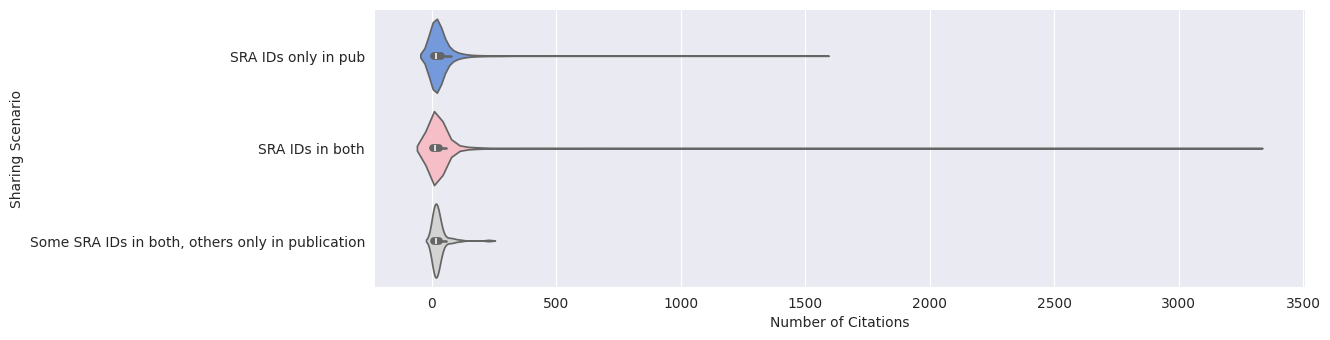

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
color1 = ['cornflowerblue','lightpink','lightgray']
figsize = (12, 1.2 * len(df_2400_studies['Sharing Scenario'].unique()))

plt.figure(figsize=figsize)
ax=sns.violinplot(df_2400_studies, x='number_of_citations', y='Sharing Scenario', inner='box', palette=color1)
ax.set_xlabel("Number of Citations",size=10)

sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
print("The mean number of citations for studies shared in both preprint and publication is:", studies_mentioned_IDs_in_both['number_of_citations'].mean())

print("The mean number of citations for studies shared only in publication is:", studies_mentioned_IDs_only_in_pub['number_of_citations'].mean())

print("The mean number of citations for studies have two scenarios is:", studies_mentioned_IDs_in_both_and_only_in_pub['number_of_citations'].mean())

The mean number of citations for studies shared in both preprint and publication is: 30.298785425101215
The mean number of citations for studies shared only in publication is: 36.327458256029686
The mean number of citations for studies have two scenarios is: 25.137931034482758


<ipython-input-7-f1c6956c1e42>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_2400_studies, x='Sharing Scenario', y='number_of_citations',palette=color1,order=order)
<ipython-input-7-f1c6956c1e42>:8: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_2400_studies, x='Sharing Scenario', y='number_of_citations',palette=color1,order=order)


Max value 3275


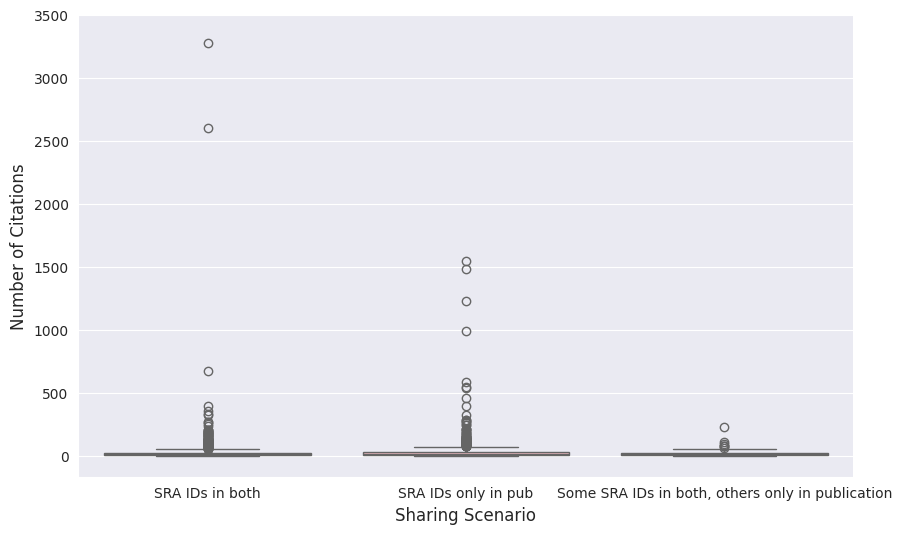

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
color1 = ['cornflowerblue','lightpink']
order = ['SRA IDs in both', 'SRA IDs only in pub', 'Some SRA IDs in both, others only in publication']
ax = sns.boxplot(data=df_2400_studies, x='Sharing Scenario', y='number_of_citations',palette=color1,order=order)
sns.despine()
ax.set_xlabel("Sharing Scenario",size=12)
ax.set_ylabel("Number of Citations",size=12)
ax.set_yticks(range(0,3501,500))
print("Max value", max(df_2400_studies['number_of_citations']))

Statistical test:

Check normality and variance across three groups to see which statistical test should be apply:

Apply Shapiro-Wilk test to see if values within three groups follow the normal distribution:

Null Hypothesis (H0): The data follows a normal distribution. This means that there is no significant deviation from normality in the dataset.


Alternative Hypothesis (H1): The data does not follow a normal distribution.This means that there is a significant deviation from normality in the dataset.

In [ ]:
import scipy.stats as stats
# Shapiro-Wilk test for normality
stat1, p1 = stats.shapiro(studies_mentioned_IDs_in_both['number_of_citations'])
stat2, p2 = stats.shapiro(studies_mentioned_IDs_only_in_pub['number_of_citations'])
stat3, p3 = stats.shapiro(studies_mentioned_IDs_in_both_and_only_in_pub['number_of_citations'])

print('Group 1: Shapiro-Wilk test statistic =', stat1, ', p-value =', p1)
print('Group 2: Shapiro-Wilk test statistic =', stat2, ', p-value =', p2)
print('Group 3: Shapiro-Wilk test statistic =', stat3, ', p-value =', p3)

# Interpretation
alpha = 0.05
if p1 > alpha:
    print("Group 1: Fail to reject the null hypothesis (data follows normal distribution)")
else:
    print("Group 1: Reject the null hypothesis (data does not follow normal distribution)")

if p2 > alpha:
    print("Group 2: Fail to reject the null hypothesis (data follows normal distribution)")
else:
    print("Group 2: Reject the null hypothesis (data does not follow normal distribution)")

if p3 > alpha:
    print("Group 3: Fail to reject the null hypothesis (data follows normal distribution)")
else:
    print("Group 3: Reject the null hypothesis (data does not follow normal distribution)")

Group 1: Shapiro-Wilk test statistic = 0.12749993883105837 , p-value = 1.2996639157611984e-59
Group 2: Shapiro-Wilk test statistic = 0.2745193412975866 , p-value = 1.0074535857801285e-53
Group 3: Shapiro-Wilk test statistic = 0.594735336125741 , p-value = 3.9163223199956613e-14
Group 1: Reject the null hypothesis (data does not follow normal distribution)
Group 2: Reject the null hypothesis (data does not follow normal distribution)
Group 3: Reject the null hypothesis (data does not follow normal distribution)


The Levene's test is used to assess the equality of variances for a variable calculated for two or more groups.

Null Hypothesis (H0): The variances are equal across the groups.

Alternative Hypothesis (H1): At least one group has a different variance.

In [ ]:
# Check homogeneity of variances using Levene's Test
stat, p = stats.levene(studies_mentioned_IDs_in_both['number_of_citations'],studies_mentioned_IDs_only_in_pub['number_of_citations'],studies_mentioned_IDs_in_both_and_only_in_pub['number_of_citations'])
print('Levene’s test statistic:', stat)
print('p-value:', p)

Levene’s test statistic: 0.8720173504643848
p-value: 0.41823982438412344


The p-value is 0.4182, which is greater than the commonly used significance level of 0.05. Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). There is no statistically significant evidence to suggest that the variances are different across the groups.


<font color='yellow'>**Apply Kruskal-Wallis H Test test**

Null Hypothesis (H0): The distribution of citation counts is the same across all groups. This implies that the medians of the groups are equal.


Alternative Hypothesis (H1): The distribution of citation counts is not the same for at least one of the groups. This implies that at least one group median is different from the others.

In [ ]:
stat, p = stats.kruskal(studies_mentioned_IDs_in_both['number_of_citations'],studies_mentioned_IDs_only_in_pub['number_of_citations'],studies_mentioned_IDs_in_both_and_only_in_pub['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 23.81282601753697
p-value: 6.746997217203806e-06
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


### Statistical test across two repositories

Load GEO analysis at first

In [39]:
import pandas as pd

df_2793_studies = pd.read_csv('2793_studies_for_3434_GSE_IDs_with_metadata.csv')
df_2793_studies['Sharing Scenario'] = df_2793_studies['Sharing Scenario'].str.strip()

In [40]:
df_2793_studies.head(3)

,Unnamed: 0,preprint_doi,published_doi,preprint_platform,preprint_publish_date_1,paper_publish_date_1,number_of_citations,set,accession_found,Sharing Scenario,time_pin_2
0,0,10.1101/001107,10.1101/gr.181016.114,bioRxiv,12/3/2013,9/29/2014,187,"{'GSE ID': 'GSE58871', 'Repository': 'GEO', 'S...",GSE58871,GSE IDs in both,3
1,1,10.1101/001479,10.3389/fgene.2015.00352,bioRxiv,12/19/2013,12/4/2015,53,"{'GSE ID': 'GSE75457', 'Repository': 'GEO', 'S...",GSE75457,GSE IDs only in pub,4
2,2,10.1101/002006,10.1186/1471-2164-15-962,bioRxiv,1/23/2014,11/7/2014,43,"{'GSE ID': 'GSE54119', 'Repository': 'GEO', 'S...",GSE54119,GSE IDs in both,5


In [41]:
df_2400_studies.head(3)

,Unnamed: 0.1,Unnamed: 0,preprint_doi,published_doi,preprint_platform,preprint_date,published_date,number_of_citations,set,accession,Sharing Scenario,time_pin_1
0,0,0,10.1101/000208,10.1101/gr.169292.113,bioRxiv,2013-11-12,2014-05-13,59,"{'SRA ID': 'ERP003980', 'Repository': 'SRA', '...",ERP003980,SRA IDs only in pub,3
1,1,1,10.1101/000422,10.3389/fgene.2014.00013,bioRxiv,2013-11-14,2014-01-31,94,"{'SRA ID': 'SRR797058', 'Repository': 'SRA', '...",SRR797058,SRA IDs in both,1
2,2,2,10.1101/001370,10.1038/nmeth.3069,bioRxiv,2013-12-13,2014-08-17,124,"{'SRA ID': 'SRX386284', 'Repository': 'SRA', '...",SRX386284,SRA IDs in both,1


Merge together

In [42]:
selected_columns_1 = ['number_of_citations','Sharing Scenario']

df_2793_studies_selected = df_2793_studies[selected_columns_1]
df_2793_studies_selected['Which_Repo'] = 'GEO'

df_2400_studies_selected = df_2400_studies[selected_columns_1]
df_2400_studies_selected['Which_Repo'] = 'SRA'

df_5193_studies = pd.concat([df_2793_studies_selected,df_2400_studies_selected], ignore_index=True)

<ipython-input-42-ccb1cf441a94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2793_studies_selected['Which_Repo'] = 'GEO'
<ipython-input-42-ccb1cf441a94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2400_studies_selected['Which_Repo'] = 'SRA'


In [43]:
df_5193_studies.head(3)

,number_of_citations,Sharing Scenario,Which_Repo
0,187,GSE IDs in both,GEO
1,53,GSE IDs only in pub,GEO
2,43,GSE IDs in both,GEO


Accession IDs mentioned in both:

In [44]:
sra_in_both = df_5193_studies.loc[df_5193_studies['Sharing Scenario']=='SRA IDs in both']
gse_in_both = df_5193_studies.loc[df_5193_studies['Sharing Scenario']=='GSE IDs in both']

stat, p = stats.mannwhitneyu(sra_in_both['number_of_citations'],gse_in_both['number_of_citations'])

print('Mann-Whitney U test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Mann-Whitney U test statistic: 765912.0
p-value: 2.2658612580856473e-07
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


Accession IDs mentioned only in publications:

In [45]:
sra_in_both = df_5193_studies.loc[df_5193_studies['Sharing Scenario']=='SRA IDs only in pub']
gse_in_both = df_5193_studies.loc[df_5193_studies['Sharing Scenario']=='GSE IDs only in pub']

stat, p = stats.mannwhitneyu(sra_in_both['number_of_citations'],gse_in_both['number_of_citations'])

print('Mann-Whitney U test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Mann-Whitney U test statistic: 652581.0
p-value: 0.00825627036462952
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


Some accession IDs mentioned in both, some mentioned only in publications:

In [46]:
sra_some_other = df_5193_studies.loc[df_5193_studies['Sharing Scenario']=='Some SRA IDs in both, others only in publication']
gse_some_other = df_5193_studies.loc[df_5193_studies['Sharing Scenario']=='Some GSE IDs in both, others only in publication']

stat, p = stats.mannwhitneyu(sra_some_other['number_of_citations'],gse_some_other['number_of_citations'])

print('Mann-Whitney U test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Mann-Whitney U test statistic: 3505.5
p-value: 0.04782762887860253
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


# Investigate how do different preprint platforms affect distribution of interval of dates (sequencing published dates V.S. preprint/publication posting dates)

<ipython-input-9-44897b825e8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.violinplot(df_2400_studies, x='number_of_citations', y='preprint_platform', inner='box', palette='Dark2')


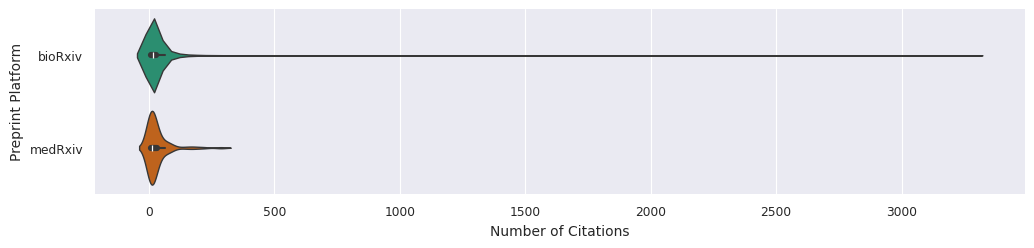

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
figsize = (12, 1.2 * len(df_2400_studies['preprint_platform'].unique()))
plt.figure(figsize=figsize)
ax=sns.violinplot(df_2400_studies, x='number_of_citations', y='preprint_platform', inner='box', palette='Dark2')
ax.set_xlabel("Number of Citations",size=10)
ax.set_ylabel("Preprint Platform",size=10)
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd

df_2793_studies = pd.read_csv('2793_studies_for_3434_GSE_IDs_with_metadata.csv')
df_2793_studies['Which_Repo'] = 'GEO'
df_2400_studies['Which_Repo'] = 'SRA'

selected_columns = ['Which_Repo','preprint_platform','number_of_citations']
df_whole_repo_with_platform = pd.concat([df_2793_studies[selected_columns],df_2400_studies[selected_columns]], ignore_index=True)
df_whole_repo_with_platform

,Which_Repo,preprint_platform,number_of_citations
0,GEO,bioRxiv,187
1,GEO,bioRxiv,53
2,GEO,bioRxiv,43
3,GEO,bioRxiv,96
4,GEO,bioRxiv,173
...,...,...,...
5188,SRA,bioRxiv,48
5189,SRA,bioRxiv,8
5190,SRA,bioRxiv,12
5191,SRA,bioRxiv,4


In [ ]:
number_of_medrxiv = df_whole_repo_with_platform.loc[df_whole_repo_with_platform['preprint_platform'] == 'medRxiv']
print(len(number_of_medrxiv))

173


In [ ]:
print(number_of_medrxiv['number_of_citations'].describe())

count    173.000000
mean      33.421965
std       49.230367
min        0.000000
25%        8.000000
50%       15.000000
75%       32.000000
max      318.000000
Name: number_of_citations, dtype: float64


In [ ]:
number_of_biorxiv = df_whole_repo_with_platform.loc[df_whole_repo_with_platform['preprint_platform'] == 'bioRxiv']
print(len(number_of_biorxiv))

5020


In [ ]:
print(number_of_medrxiv['number_of_citations'].describe())

count    173.000000
mean      33.421965
std       49.230367
min        0.000000
25%        8.000000
50%       15.000000
75%       32.000000
max      318.000000
Name: number_of_citations, dtype: float64


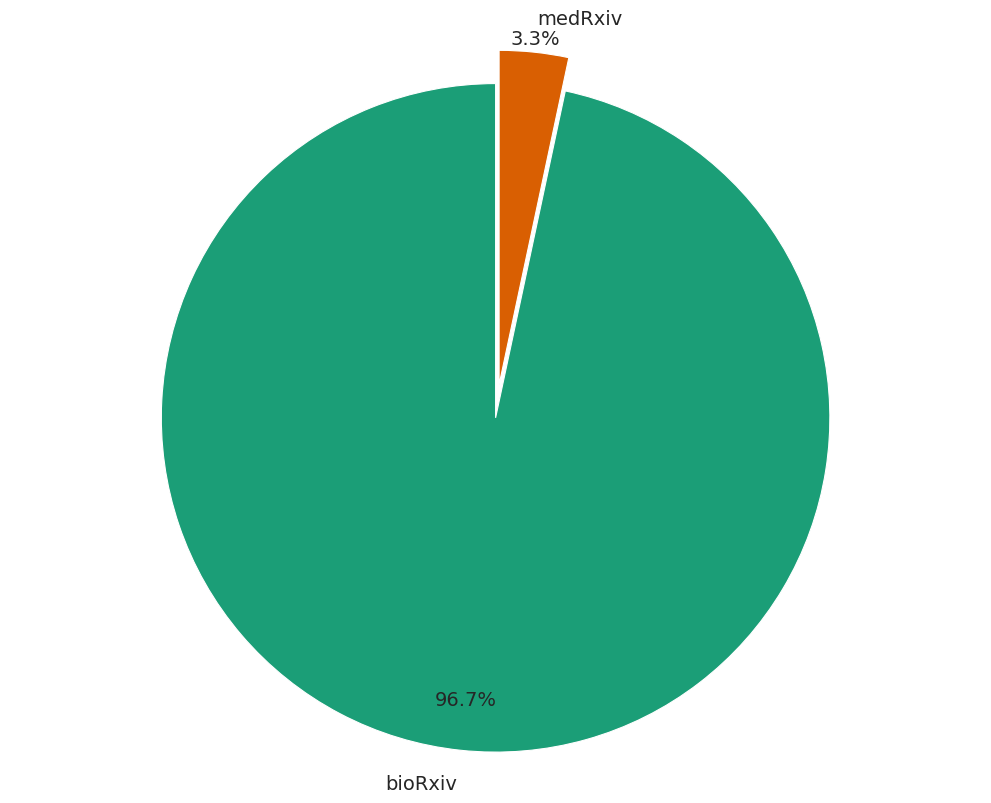

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_context("paper")
# Calculate the counts for each preprint platform
platform_counts = df_whole_repo_with_platform['preprint_platform'].value_counts()

# Create an explode tuple with the same length as platform_counts
explode = tuple(0.1 if platform == 'medRxiv' else 0 for platform in platform_counts.index)

# Create a pie plot
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(platform_counts.values,
                                   labels=platform_counts.index,
                                   autopct='%1.1f%%',
                                   colors=sns.color_palette('Dark2', n_colors=len(platform_counts)),
                                   startangle=90,
                                   explode=explode,
                                   pctdistance=0.85,  # Adjust this value to move percentage labels
                                   textprops={'fontsize': 14})

# Adjust the position of the text for the exploded slice
for i, autotext in enumerate(autotexts):
    if explode[i] != 0:  # This is the exploded slice
        autotext.set_position((autotext.get_position()[0] * 1.2, autotext.get_position()[1] * 1.2))

plt.axis('equal')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of citations')

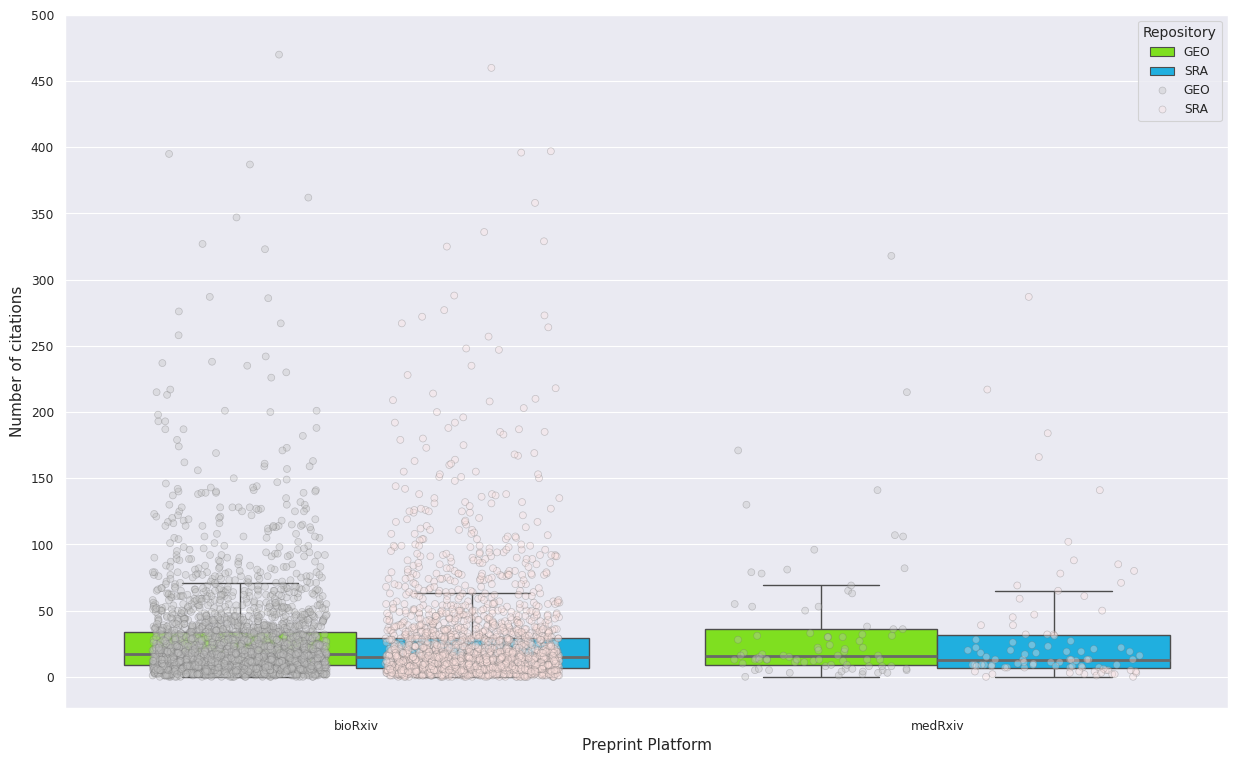

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")
color=['chartreuse','deepskyblue']
strip_colors = ['silver', 'mistyrose']
df_whole_repo_with_platform_remove_outliers = df_whole_repo_with_platform[df_whole_repo_with_platform['number_of_citations'] <= 500]
plt.figure(figsize=(15, 9))
ax = sns.boxplot(data=df_whole_repo_with_platform_remove_outliers, x='preprint_platform', y='number_of_citations', hue ='Which_Repo', palette=color, showfliers=False,medianprops={'color':'dimgrey', 'linewidth':2})
ax = sns.stripplot(data=df_whole_repo_with_platform_remove_outliers, x='preprint_platform', y='number_of_citations', hue='Which_Repo', dodge=True, jitter=0.3, alpha=0.35, linewidth=0.5,palette=strip_colors)
ax.legend(loc='upper right', bbox_to_anchor=(1.0,1.0), title='Repository', title_fontsize=10)
ax.set_yticks(range(0,501,50))
plt.xlabel("Preprint Platform",size=11)
plt.ylabel("Number of citations",size=11)

Statistical test:

In [ ]:
df_whole_repo_with_platform_remove_outliers

,Which_Repo,preprint_platform,number_of_citations
0,GEO,bioRxiv,187
1,GEO,bioRxiv,53
2,GEO,bioRxiv,43
3,GEO,bioRxiv,96
4,GEO,bioRxiv,173
...,...,...,...
5188,SRA,bioRxiv,48
5189,SRA,bioRxiv,8
5190,SRA,bioRxiv,12
5191,SRA,bioRxiv,4


In [ ]:
df_whole_repo_with_platform_remove_outliers.loc[df_whole_repo_with_platform_remove_outliers['preprint_platform'] == 'bioRxiv'].shape[0]

5000

In [ ]:
clusters = df_whole_repo_with_platform_remove_outliers.loc[df_whole_repo_with_platform_remove_outliers['number_of_citations']<=50]
print(len(clusters))

4469


In [ ]:
biorxiv_in_cluster = clusters.loc[clusters['preprint_platform'] == 'bioRxiv']
medrixv_in_cluster = clusters.loc[clusters['preprint_platform'] == 'medRxiv']

print(len(biorxiv_in_cluster))
print(len(medrixv_in_cluster))

4329
140


In [ ]:
df_whole_repo_with_platform_remove_outliers.groupby(['preprint_platform', 'Which_Repo'])['number_of_citations'].describe()

count       mean        std  min  25%   50%  \
preprint_platform Which_Repo                                                 
bioRxiv           GEO         2701.0  28.830063  37.425971  0.0  9.0  17.0   
                  SRA         2299.0  27.167899  39.880409  0.0  7.0  15.0   
medRxiv           GEO           82.0  36.000000  50.783734  0.0  9.0  16.0   
                  SRA           91.0  31.098901  47.950218  0.0  7.0  13.0   

                               75%    max  
preprint_platform Which_Repo               
bioRxiv           GEO         34.0  470.0  
                  SRA         29.5  460.0  
medRxiv           GEO         36.0  318.0  
                  SRA         31.5  287.0

In [ ]:
biorxiv = df_whole_repo_with_platform_remove_outliers.loc[df_whole_repo_with_platform_remove_outliers['preprint_platform'] == 'bioRxiv']
medrixv = df_whole_repo_with_platform_remove_outliers.loc[df_whole_repo_with_platform_remove_outliers['preprint_platform'] == 'medRxiv']

In [ ]:
geo_biorixv_median = biorxiv[biorxiv['Which_Repo'] == 'GEO']['number_of_citations'].median()
geo_medrixv_median = medrixv[medrixv['Which_Repo'] == 'GEO']['number_of_citations'].median()

print(geo_biorixv_median)
print(geo_medrixv_median)

17.0
16.0


In [ ]:
sra_biorxiv_median = biorxiv[biorxiv['Which_Repo'] == 'SRA']['number_of_citations'].median()
sra_medrixv_median = medrixv[medrixv['Which_Repo'] == 'SRA']['number_of_citations'].median()

print(sra_biorxiv_median)
print(sra_medrixv_median)

15.0
13.0


In [ ]:
GEO = df_whole_repo_with_platform_remove_outliers.loc[df_whole_repo_with_platform_remove_outliers['Which_Repo'] == 'GEO']
SRA = df_whole_repo_with_platform_remove_outliers.loc[df_whole_repo_with_platform_remove_outliers['Which_Repo'] == 'SRA']

<font color='yellow'>**Apply Kruskal-Wallis H Test test**

For different preprint platforms:

Null Hypothesis (H0): The distribution of citation counts is the same across all groups. This implies that the medians of the groups are equal.


Alternative Hypothesis (H1): The distribution of citation counts is not the same for at least one of the groups. This implies that at least one group median is different from the others.

In [ ]:
import scipy.stats as stats

stat, p = stats.kruskal(biorxiv['number_of_citations'],medrixv['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 0.0003692780928546578
p-value: 0.9846683073316411
Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.


For GEO/SRA repositories:

Null Hypothesis (H0): The distribution of citation counts is the same across all groups. This implies that the medians of the groups are equal.


Alternative Hypothesis (H1): The distribution of citation counts is not the same for at least one of the groups. This implies that at least one group median is different from the others.

In [ ]:
import scipy.stats as stats

stat, p = stats.kruskal(GEO['number_of_citations'],SRA['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 34.750300884005924
p-value: 3.74820769652823e-09
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


## Now, let's consider the influence of which year did they publish the paper and categories on number of citations:

We only consider 2,355 studies that have only one sequencing data-sharing scenario among five for all of their mentioned primary GSE IDs:

In [ ]:
import pandas as pd
import statistics

selected_columns2 = ['published_date','time_pin_1','number_of_citations']

df_2355_only_have_one_time_pin = pd.read_csv("df_2355_studies_that_only_have_one_time_pin_for_SRAIDs.csv",index_col=False)

citations_stack_in_total = df_2355_only_have_one_time_pin[selected_columns2]

citations_stack_in_total['published_date'] = pd.to_datetime(citations_stack_in_total['published_date'],errors='coerce')
citations_stack_in_total['year'] = citations_stack_in_total['published_date'].dt.year
citations_stack_in_total

<ipython-input-18-07fce2a31dec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_in_total['published_date'] = pd.to_datetime(citations_stack_in_total['published_date'],errors='coerce')
<ipython-input-18-07fce2a31dec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_in_total['year'] = citations_stack_in_total['published_date'].dt.year


,published_date,time_pin_1,number_of_citations,year
0,2014-05-13,3,59,2014
1,2014-01-31,1,94,2014
2,2014-08-17,1,124,2014
3,2014-07-11,1,96,2014
4,2014-08-13,3,135,2014
...,...,...,...,...
2350,2021-01-27,3,48,2021
2351,2021-05-11,3,8,2021
2352,2020-07-03,1,12,2020
2353,2020-03-30,1,4,2020


{'1': array([ 322,  298,  574,  841, 1918, 2556, 2602, 1340,  210]), '2': array([  0,   0,   0, 225,  56, 146,  55, 101,   0]), '3': array([ 1835,  2138,  2432,  9852,  9135,  9157, 11343,  8082,   662]), '4': array([  0,   0,   0,  87, 109, 102, 280, 308,  16]), '5': array([  77,  999,  216, 2298, 1112, 1752, 2197, 1146,  105])}


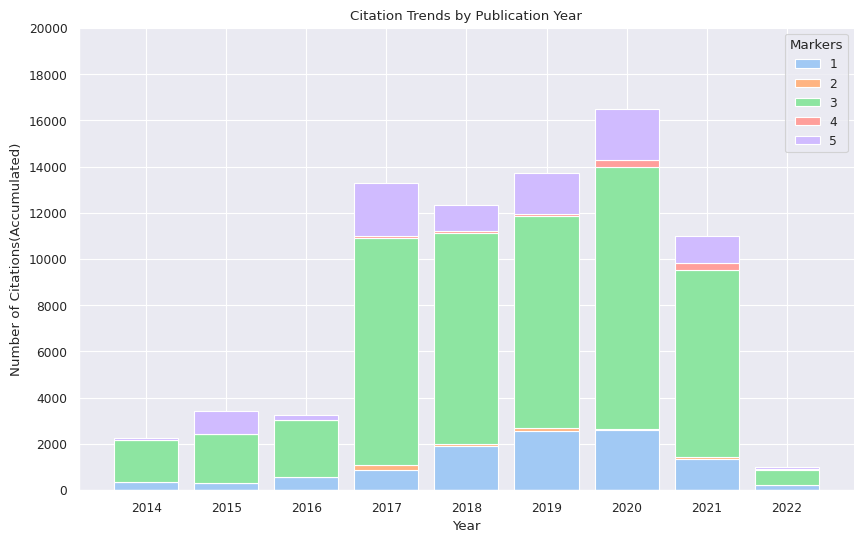

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("paper")
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))

years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
markers = [1, 2, 3, 4, 5]
pastel_palette = sns.color_palette("pastel")

citation_stacks = {}
for i in markers:
    group = citations_stack_in_total.loc[citations_stack_in_total['time_pin_1'] == i]
    citation_stacks[str(i)] = group.groupby('year')['number_of_citations'].sum().reindex(index=years, fill_value=0).values
print(citation_stacks)

width = 0.8
bottom = np.zeros(len(years))

for i, (marker, citation_stack) in enumerate(citation_stacks.items()):
    color = pastel_palette[i % len(pastel_palette)]
    p = ax.bar(years, citation_stack, width, label=f"{marker}", bottom=bottom, color=color)
    bottom += citation_stack

ax.set_title("Citation Trends by Publication Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Citations(Accumulated)")

ax.set_xticks(years)
ax.set_yticks(range(0,22000,2000))
ax.legend(title="Markers")
sns.despine()

### Statistical test:

Data-processing, Step 1:

Re-organized the dataframe based on which year these studies were published:

In [ ]:
which_year = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
citations_by_year = {}
for i in which_year:
    citations_by_year[f"{i}(year)"] = citations_stack_in_total.loc[citations_stack_in_total['year'] == i]
citations_by_year

{'2014(year)':    published_date  time_pin_1  number_of_citations  year
 0      2014-05-13           3                   59  2014
 1      2014-01-31           1                   94  2014
 2      2014-08-17           1                  124  2014
 3      2014-07-11           1                   96  2014
 4      2014-08-13           3                  135  2014
 5      2014-12-06           5                   14  2014
 7      2014-10-07           3                   94  2014
 8      2014-12-04           5                   16  2014
 9      2014-09-04           1                    8  2014
 10     2014-11-12           3                 1547  2014
 17     2014-10-28           5                   18  2014
 19     2014-11-10           5                   29  2014,
 '2015(year)':    published_date  time_pin_1  number_of_citations  year
 6      2015-05-13           3                  104  2015
 11     2015-02-06           3                   26  2015
 12     2015-06-15           3             

Data-processing, Step 2:

1. Calculate how many studies were published in the year
2. Calculate total number of citations of studies that published in the year
3. Calculate the mean number of citations of a year

In [ ]:
which_year = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
citations_by_year = {}

# Create a dictionary with dataframes for each year
for i in which_year:
    citations_by_year[f"{i}(year)"] = citations_stack_in_total.loc[citations_stack_in_total['year'] == i]

# Initialize dictionaries to store results
number_of_studies_per_year = {}
sum_per_year = {}
mean_citations_per_year = {}
median_citations_per_year = {}
# Now, iterate over the dictionary items
for year, dataframe in citations_by_year.items():
    number_of_studies = len(dataframe)
    sum_citations = dataframe['number_of_citations'].sum()
    mean_citations = sum_citations / number_of_studies if number_of_studies > 0 else 0
    median_citations = dataframe['number_of_citations'].median() # Calculate median

    # Store the calculated values in the dictionaries
    number_of_studies_per_year[year] = number_of_studies
    sum_per_year[year] = sum_citations
    mean_citations_per_year[year] = mean_citations
    median_citations_per_year[year] = median_citations # Store median


print(mean_citations_per_year)
print(number_of_studies_per_year)
print(median_citations_per_year)

{'2014(year)': 186.16666666666666, '2015(year)': 118.44827586206897, '2016(year)': 54.610169491525426, '2017(year)': 91.7448275862069, '2018(year)': 46.528301886792455, '2019(year)': 30.204845814977972, '2020(year)': 25.585403726708076, '2021(year)': 16.682370820668694, '2022(year)': 11.157303370786517}
{'2014(year)': 12, '2015(year)': 29, '2016(year)': 59, '2017(year)': 145, '2018(year)': 265, '2019(year)': 454, '2020(year)': 644, '2021(year)': 658, '2022(year)': 89}
{'2014(year)': 76.5, '2015(year)': 68.0, '2016(year)': 31.0, '2017(year)': 31.0, '2018(year)': 23.0, '2019(year)': 17.0, '2020(year)': 14.0, '2021(year)': 9.0, '2022(year)': 7.0}


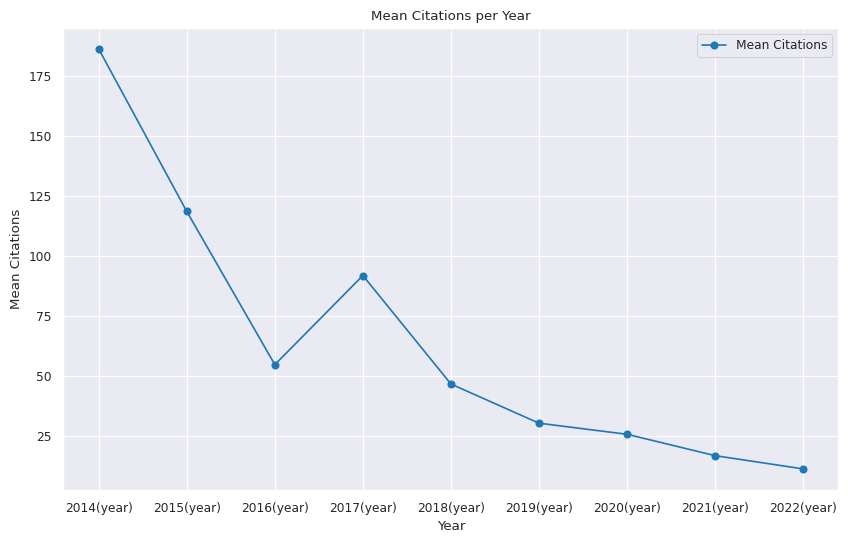

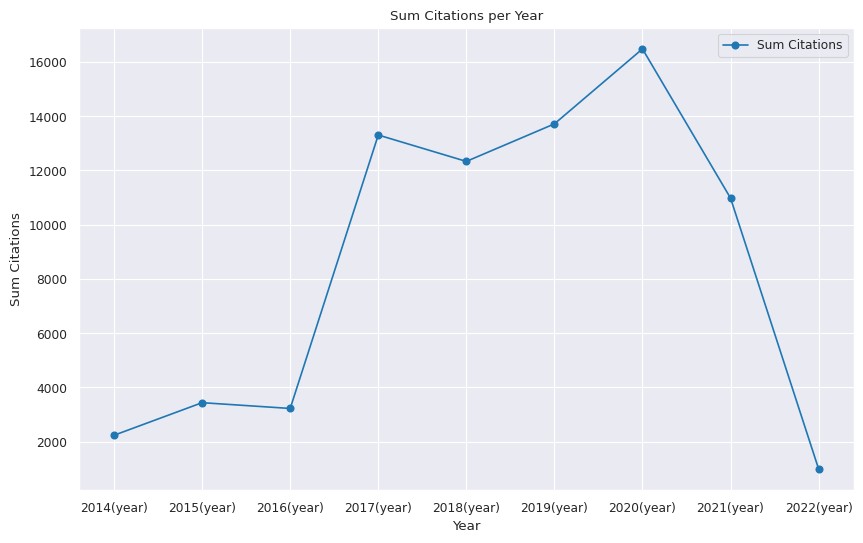

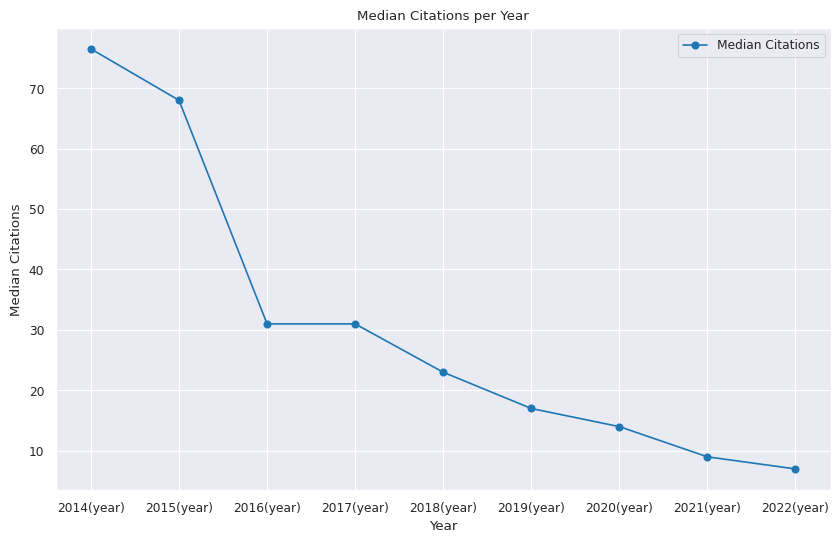

In [ ]:
import matplotlib.pyplot as plt

# Assuming the dictionaries are already populated as per your previous code
years = list(mean_citations_per_year.keys())
mean_values = list(mean_citations_per_year.values())
sum_values = list(sum_per_year.values())
median_values = list(median_citations_per_year.values())

# Plotting mean citations per year
plt.figure(figsize=(10, 6))
plt.plot(years, mean_values, marker='o', label='Mean Citations')
plt.title('Mean Citations per Year')
plt.xlabel('Year')
plt.ylabel('Mean Citations')
plt.legend()
plt.show()

# Plotting sum citations per year
plt.figure(figsize=(10, 6))
plt.plot(years, sum_values, marker='o', label='Sum Citations')
plt.title('Sum Citations per Year')
plt.xlabel('Year')
plt.ylabel('Sum Citations')
plt.legend()
plt.show()

# Plotting median citations per year
plt.figure(figsize=(10, 6))
plt.plot(years, median_values, marker='o', label='Median Citations')
plt.title('Median Citations per Year')
plt.xlabel('Year')
plt.ylabel('Median Citations')
plt.legend()
plt.show()


Data-processing, Step 3:

Re-organize the dataframe based on different categories(5 markers):


1. Under each category, calculate total number of citations within different years


In [ ]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
markers = [1, 2, 3, 4, 5]
citation_stacks = {}

for i in markers:
    group = citations_stack_in_total.loc[citations_stack_in_total['time_pin_1'] == i]
    print(group)
    citation_stacks[str(i)] = group.groupby('year')['number_of_citations'].sum().reindex(index=years, fill_value=0).values
print(citation_stacks)

     published_date  time_pin_1  number_of_citations  year
1        2014-01-31           1                   94  2014
2        2014-08-17           1                  124  2014
3        2014-07-11           1                   96  2014
9        2014-09-04           1                    8  2014
20       2015-02-03           1                  125  2015
...             ...         ...                  ...   ...
2334     2020-03-04           1                   22  2020
2340     2020-02-17           1                   22  2020
2346     2020-05-19           1                   14  2020
2352     2020-07-03           1                   12  2020
2353     2020-03-30           1                    4  2020

[443 rows x 4 columns]
     published_date  time_pin_1  number_of_citations  year
139      2017-04-14           2                   23  2017
186      2017-07-27           2                   92  2017
245      2017-10-16           2                   33  2017
250      2017-09-25           2 

Data-processing, Step 4:

1. Under each category, calculate total number of citations within different years

2. Under each category, count how many studies were published within different years

3. Under each category, calculate average number of citations within different years

4. Under each category, calculate median number of citations within different years

In [ ]:
#median calc
import numpy as np
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
markers = [1, 2, 3, 4, 5]

citation_stacks = {}
number_of_studies = {}
categorized_by_years_for_mean_value = {str(year): [] for year in years}
categorized_by_years_for_median_value = {str(year): [] for year in years}

for i in markers:
    group = citations_stack_in_total.loc[citations_stack_in_total['time_pin_1'] == i]
    citation_stacks[str(i)] = group.groupby('year')['number_of_citations'].sum().reindex(index=years, fill_value=0).values
    number_of_studies[str(i)] = []

    for j in years:
        studies_in_year = len(group.loc[group['year'] == j])
        number_of_studies[str(i)].append(studies_in_year)

print("Total number of citations per year, separated by five categories:", citation_stacks)
print("accumulated citation counts per Year:", number_of_studies)

average_numberofcitations_per_year = {}
for key in citation_stacks:
    # Convert the array to a list
    values1 = list(citation_stacks[key])
    values2 = number_of_studies[key]
    average_numberofcitations_per_year[key] = [v1 / v2 if v2 != 0 else 0 for v1, v2 in zip(values1, values2)]
print("Average number of citations per Year:", average_numberofcitations_per_year)

for key, averages in average_numberofcitations_per_year.items():
    for year, average in zip(years, averages):
        categorized_by_years_for_mean_value [str(year)].append(average)

print(categorized_by_years_for_mean_value)


median_numberofcitations_per_year = {}
for i in markers:
    group = citations_stack_in_total.loc[citations_stack_in_total['time_pin_1'] == i]
    finding_median = group.groupby('year')['number_of_citations'].median().reindex(index=years, fill_value=0).values
    median_numberofcitations_per_year[str(i)] = finding_median

print("Median number of citations per Year:", median_numberofcitations_per_year)

for key, medians in median_numberofcitations_per_year.items():
    for year, median in zip(years, medians):
        categorized_by_years_for_median_value[str(year)].append(median)

print(categorized_by_years_for_median_value)


Total number of citations per year, separated by five categories: {'1': array([ 322,  298,  574,  841, 1918, 2556, 2602, 1340,  210]), '2': array([  0,   0,   0, 225,  56, 146,  55, 101,   0]), '3': array([ 1835,  2138,  2432,  9852,  9135,  9157, 11343,  8082,   662]), '4': array([  0,   0,   0,  87, 109, 102, 280, 308,  16]), '5': array([  77,  999,  216, 2298, 1112, 1752, 2197, 1146,  105])}
accumulated citation counts per Year: {'1': [4, 4, 12, 24, 44, 80, 135, 118, 22], '2': [0, 0, 0, 4, 2, 3, 4, 11, 0], '3': [4, 17, 36, 88, 175, 286, 418, 438, 53], '4': [0, 0, 0, 2, 3, 5, 4, 13, 3], '5': [4, 8, 11, 27, 41, 80, 83, 78, 11]}
Average number of citations per Year: {'1': [80.5, 74.5, 47.833333333333336, 35.041666666666664, 43.59090909090909, 31.95, 19.274074074074075, 11.35593220338983, 9.545454545454545], '2': [0, 0, 0, 56.25, 28.0, 48.666666666666664, 13.75, 9.181818181818182, 0], '3': [458.75, 125.76470588235294, 67.55555555555556, 111.95454545454545, 52.2, 32.01748251748252, 27.13

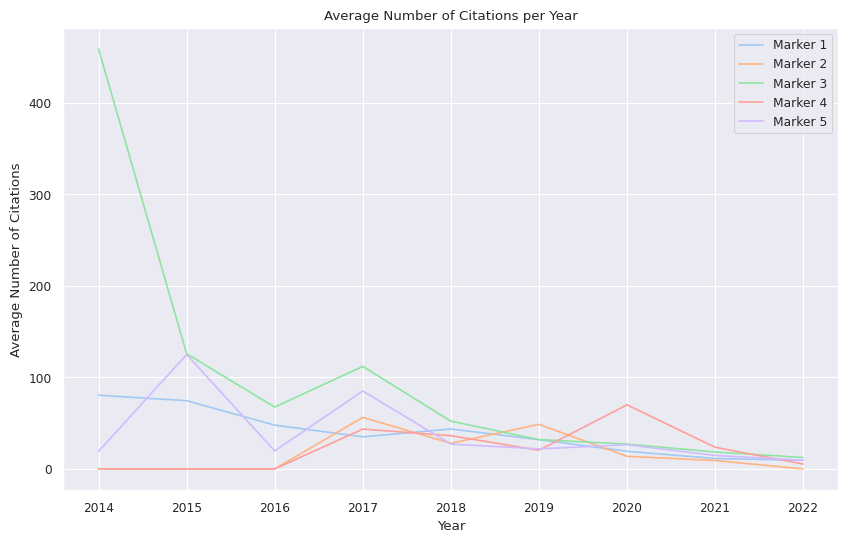

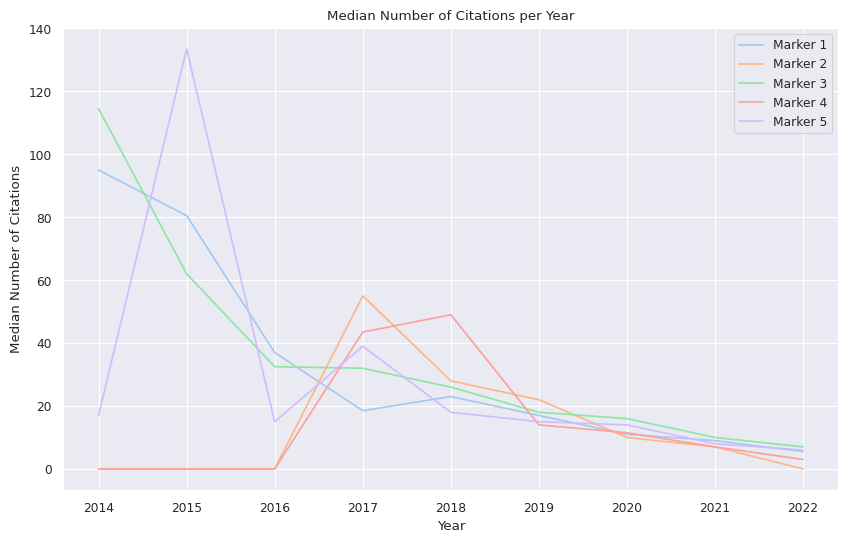

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pastel_palette = sns.color_palette("pastel", len(average_numberofcitations_per_year))

# Plotting average number of citations per year
plt.figure(figsize=(10, 6))
for i, (key, color) in enumerate(zip(average_numberofcitations_per_year, pastel_palette)):
    plt.plot(years, average_numberofcitations_per_year[key], label=f'Marker {key}', color=color)
plt.title('Average Number of Citations per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Citations')
plt.legend()
plt.show()

# Plotting median number of citations per year
plt.figure(figsize=(10, 6))
for i, (key, color) in enumerate(zip(median_numberofcitations_per_year, pastel_palette)):
    plt.plot(years, median_numberofcitations_per_year[key], label=f'Marker {key}', color=color)
plt.title('Median Number of Citations per Year')
plt.xlabel('Year')
plt.ylabel('Median Number of Citations')
plt.legend()
plt.show()

In [ ]:
import numpy as np
# Provided dictionary
median_citations = {
    '1': np.array([95.0, 80.5, 37.0, 18.5, 23.0, 17.0, 11.0, 9.0, 5.5]),
    '2': np.array([0.0, 0.0, 0.0, 55.0, 28.0, 22.0, 10.0, 7.0, 0.0]),
    '3': np.array([114.5, 62.0, 32.5, 32.0, 26.0, 18.0, 16.0, 10.0, 7.0]),
    '4': np.array([0.0, 0.0, 0.0, 43.5, 49.0, 14.0, 11.5, 7.0, 3.0]),
    '5': np.array([17.0, 133.5, 15.0, 39.0, 18.0, 15.0, 14.0, 8.0, 6.0])
}

# Calculate the sum for each marker
sum_citations = {marker: np.sum(citations) for marker, citations in median_citations.items()}

# Print the sum for each marker
for marker, total in sum_citations.items():
    print(f"Sum of median citations for Marker {marker}: {total}")


Sum of median citations for Marker 1: 296.5
Sum of median citations for Marker 2: 122.0
Sum of median citations for Marker 3: 318.0
Sum of median citations for Marker 4: 128.0
Sum of median citations for Marker 5: 265.5


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = []

data_dict = categorized_by_years_for_median_value
markers = [1, 2, 3, 4, 5]

for label, items in data_dict.items():
    for marker, item in zip(markers, items):
        data.append({'which_year': label, 'Marker': marker , 'mean_number_of_citations': item})

df = pd.DataFrame(data)

df

,which_year,Marker,mean_number_of_citations
0,2014,1,95.0
1,2014,2,0.0
2,2014,3,114.5
3,2014,4,0.0
4,2014,5,17.0
5,2015,1,80.5
6,2015,2,0.0
7,2015,3,62.0
8,2015,4,0.0
9,2015,5,133.5


In [ ]:
# Model formula
formula = 'mean_number_of_citations ~ C(which_year) + C(Marker)'

model = ols(formula, data=df).fit()

# Performing two-way ANOVA
anova_results = anova_lm(model, typ=2)
print(anova_results)

                     sum_sq    df         F    PR(>F)
C(which_year)  12453.244444   8.0  2.095954  0.065843
C(Marker)       3934.944444   4.0  1.324548  0.282042
Residual       23766.255556  32.0       NaN       NaN


# Investigate would author take different data sharing strategy for different species

In [ ]:
import pandas as pd

df_SRA_repo = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations_and_latest_SRR_published_date.csv",encoding='utf-8')
df_GEO_repo = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_whole_analysis.csv")

species_counts_for_SRA = df_SRA_repo['Scientific_Name'].value_counts()
species_counts_for_GEO = df_GEO_repo['Scientific_Name'].value_counts()

print(species_counts_for_SRA)
print(species_counts_for_GEO)

Scientific_Name
Homo sapiens                           448
Mus musculus                           178
Salmo salar                            125
Klebsiella pneumoniae                  121
Gallus gallus                           92
                                      ... 
Coffea arabica                           1
Macadamia jansenii                       1
Xanthomonas vasicola pv. vasculorum      1
Bacillus cereus ATCC 14579               1
Adineta vaga                             1
Name: count, Length: 1019, dtype: int64
Scientific_Name
Homo sapiens                         1378
Mus musculus                         1045
Drosophila melanogaster               168
Saccharomyces cerevisiae               94
Arabidopsis thaliana                   84
                                     ... 
Pundamilia nyererei                     1
Taeniopygia guttata                     1
Aliivibrio fischeri ES114               1
Brassica rapa subsp. trilocularis       1
Nakaseomyces glabratus             

In [ ]:
print(len(df_SRA_repo))
print(len(df_GEO_repo))

4179
3435


In [ ]:
picked_out_species_for_SRA = df_SRA_repo.loc[(df_SRA_repo['Scientific_Name']=='Homo sapiens')|(df_SRA_repo['Scientific_Name']=='Mus musculus')]
picked_out_species_for_GEO = df_GEO_repo.loc[(df_GEO_repo['Scientific_Name']=='Homo sapiens')|(df_GEO_repo['Scientific_Name']=='Mus musculus')]

selected_columns_for_SRA = ['Scientific_Name','time_pin_1','number_of_citations']
selected_columns_for_GEO = ['Scientific_Name','time_pin_2','number_of_citations']

citations_stack_for_SRA = picked_out_species_for_SRA[selected_columns_for_SRA]
citations_stack_for_GEO = picked_out_species_for_GEO[selected_columns_for_GEO]

In [ ]:
citations_stack_for_SRA['time_pin_1'] = citations_stack_for_SRA['time_pin_1'].astype(float).astype(int).astype(str)

<ipython-input-4-7a3fc2307b22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_for_SRA['time_pin_1'] = citations_stack_for_SRA['time_pin_1'].astype(float).astype(int).astype(str)


In [ ]:
citations_stack_for_SRA.rename(columns={'time_pin_1': 'Marker'}, inplace=True)
citations_stack_for_GEO.rename(columns={'time_pin_2': 'Marker'}, inplace=True)

<ipython-input-5-2dfc7d24fff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_for_SRA.rename(columns={'time_pin_1': 'Marker'}, inplace=True)
<ipython-input-5-2dfc7d24fff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_for_GEO.rename(columns={'time_pin_2': 'Marker'}, inplace=True)


In [ ]:
citations_stack_for_SRA['Which_Repo'] = 'SRA'
citations_stack_for_GEO['Which_Repo'] = 'GEO'

<ipython-input-6-3c2db00bfeab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_for_SRA['Which_Repo'] = 'SRA'
<ipython-input-6-3c2db00bfeab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citations_stack_for_GEO['Which_Repo'] = 'GEO'


In [ ]:
whole_repo = pd.concat([citations_stack_for_SRA, citations_stack_for_GEO])
whole_repo['Marker'] = whole_repo['Marker'].astype(int)
whole_repo = whole_repo.sort_values(by='Marker')
whole_repo['Marker'] = whole_repo['Marker'].astype(str)

<ipython-input-48-4e9bf796b183>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = whole_repo.groupby(['Marker', 'Scientific_Name'])['number_of_citations'].median().reset_index()


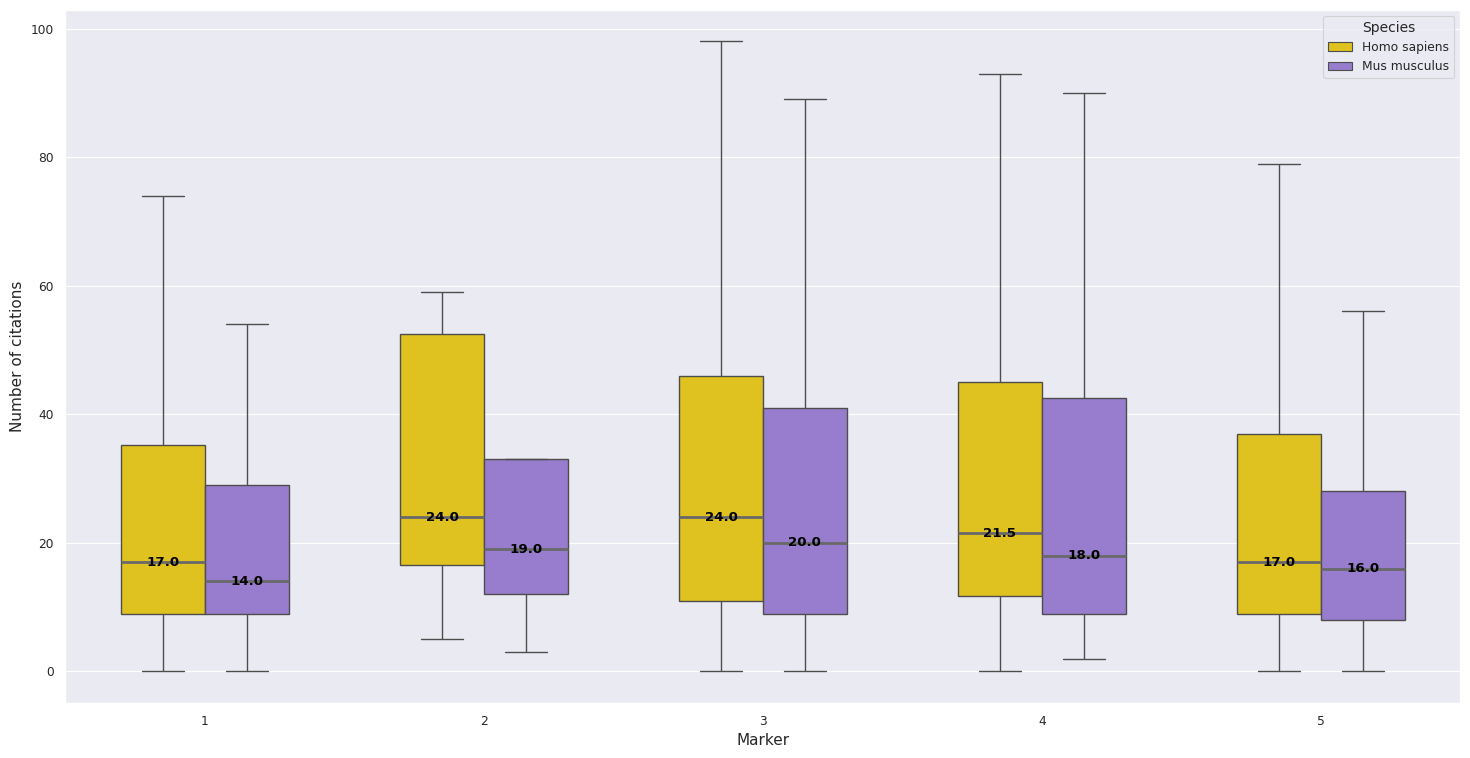

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

whole_repo['Marker'] = whole_repo['Marker'].astype('category')
median_values = whole_repo.groupby(['Marker', 'Scientific_Name'])['number_of_citations'].median().reset_index()

sns.set_style("darkgrid")
sns.set_context("paper")

plt.figure(figsize=(18, 9))
color = ['gold', 'mediumpurple']

ax = sns.boxplot(data=whole_repo, x='Marker', y='number_of_citations', hue='Scientific_Name',
                 palette=color, showfliers=False, medianprops={'color': 'dimgrey', 'linewidth': 2},
                 dodge=True, width=0.6)

for i in range(len(median_values)):
    marker = median_values.iloc[i]['Marker']
    scientific_name = median_values.iloc[i]['Scientific_Name']
    median_value = median_values.iloc[i]['number_of_citations']

    x = list(whole_repo['Marker'].cat.categories).index(marker) + (-0.15 if scientific_name == 'Homo sapiens' else 0.15)
    y = median_value

    ax.text(x, y, f'{median_value:.1f}', ha='center', va='center', fontweight='bold', color='black')

ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), title='Species', title_fontsize=10)

plt.xlabel("Marker", size=11)
plt.ylabel("Number of citations", size=11)

plt.show()

Statistical Test

In [ ]:
whole_repo

,Scientific_Name,Marker,number_of_citations,Which_Repo
1,Homo sapiens,1,124,SRA
253,Homo sapiens,1,24,GEO
239,Homo sapiens,1,10,GEO
233,Mus musculus,1,4,GEO
223,Mus musculus,1,11,GEO
...,...,...,...,...
2280,Mus musculus,5,1,GEO
2281,Mus musculus,5,1,GEO
2282,Mus musculus,5,1,GEO
2285,Homo sapiens,5,9,GEO


<Axes: xlabel='number_of_citations', ylabel='Count'>

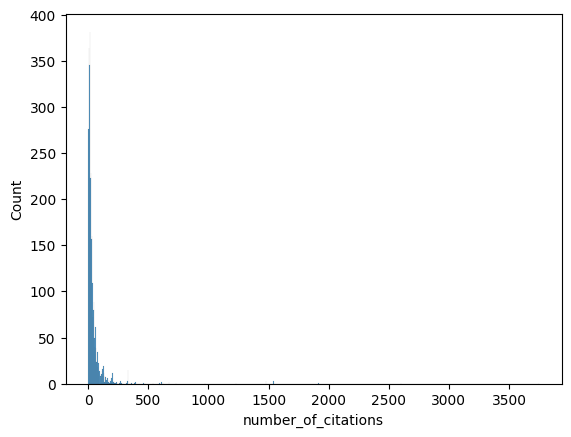

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.histplot(data=whole_repo['number_of_citations'])

<font color='yellow'>**Apply Kruskal-Wallis H Test test**

Null Hypothesis (H0): The distribution of citation counts is the same across all groups. This implies that the medians of the groups are equal.


Alternative Hypothesis (H1): The distribution of citation counts is not the same for at least one of the groups. This implies that at least one group median is different from the others.

In [ ]:
Homo_sapiens = whole_repo.loc[whole_repo['Scientific_Name'] == 'Homo sapiens']
Mus_musculus = whole_repo.loc[whole_repo['Scientific_Name'] == 'Mus musculus']

In [ ]:
import scipy.stats as stats
stat, p = stats.kruskal(Homo_sapiens['number_of_citations'], Mus_musculus['number_of_citations'])

print('Kruskal-Wallis H test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): At least one group's citation count distribution is different.")
else:
    print("Fail to reject the null hypothesis (H0): Citation count distributions are similar across groups.")

Kruskal-Wallis H test statistic: 15.127799929027217
p-value: 0.00010047280300318534
Reject the null hypothesis (H0): At least one group's citation count distribution is different.


Text(0.5, 1.0, 'Distribution of data-sharing strategies for Homo Sapiens')

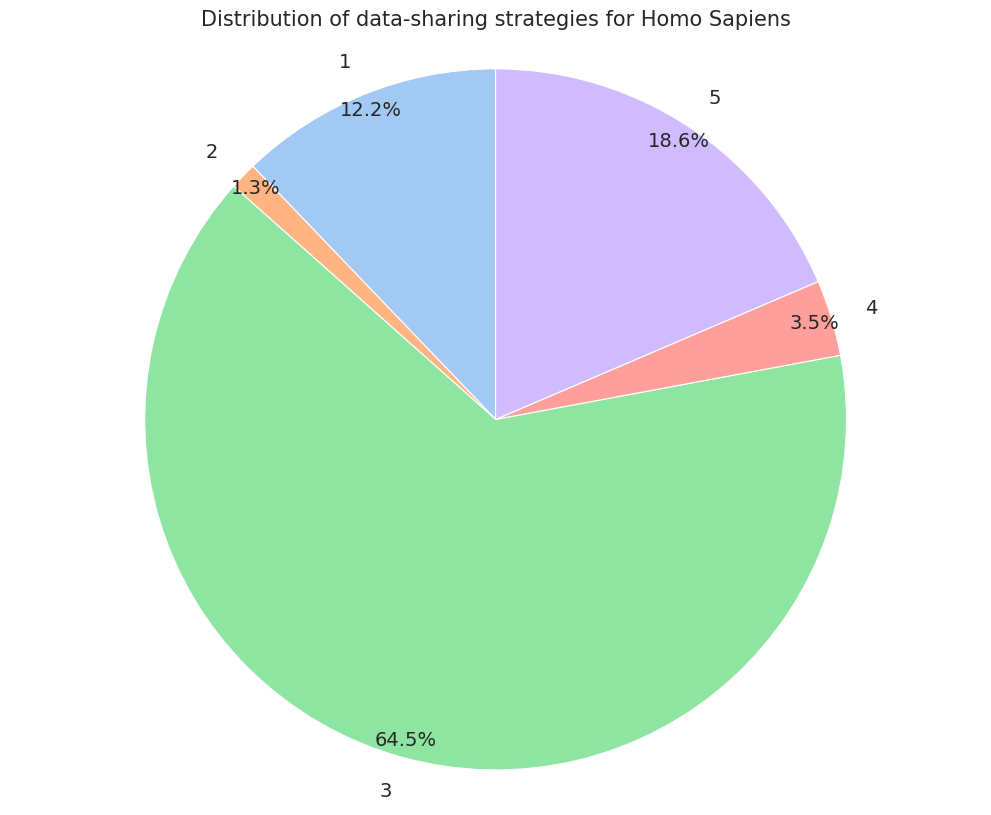

In [ ]:
homo_marker_counts = whole_repo.loc[whole_repo['Scientific_Name'] == 'Homo sapiens']['Marker'].value_counts()
custom_color = ['#a1c9f4','#ffb482','#8de5a1','#ff9f9b','#d0bbff']
marker_new_order = ['1','2','3','4','5']
homo_marker_counts = homo_marker_counts.reindex(marker_new_order)
sns.set_context("paper")

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(homo_marker_counts.values,
                                   labels=homo_marker_counts.index,
                                   autopct='%1.1f%%',
                                   colors=custom_color,
                                   startangle=90,
                                   pctdistance=0.95,
                                   textprops={'fontsize': 14})
plt.axis('equal')
plt.tight_layout()

plt.title("Distribution of data-sharing strategies for Homo Sapiens", size=15)

Text(0.5, 1.0, 'Distribution of data-sharing strategies for Mus Musculus')

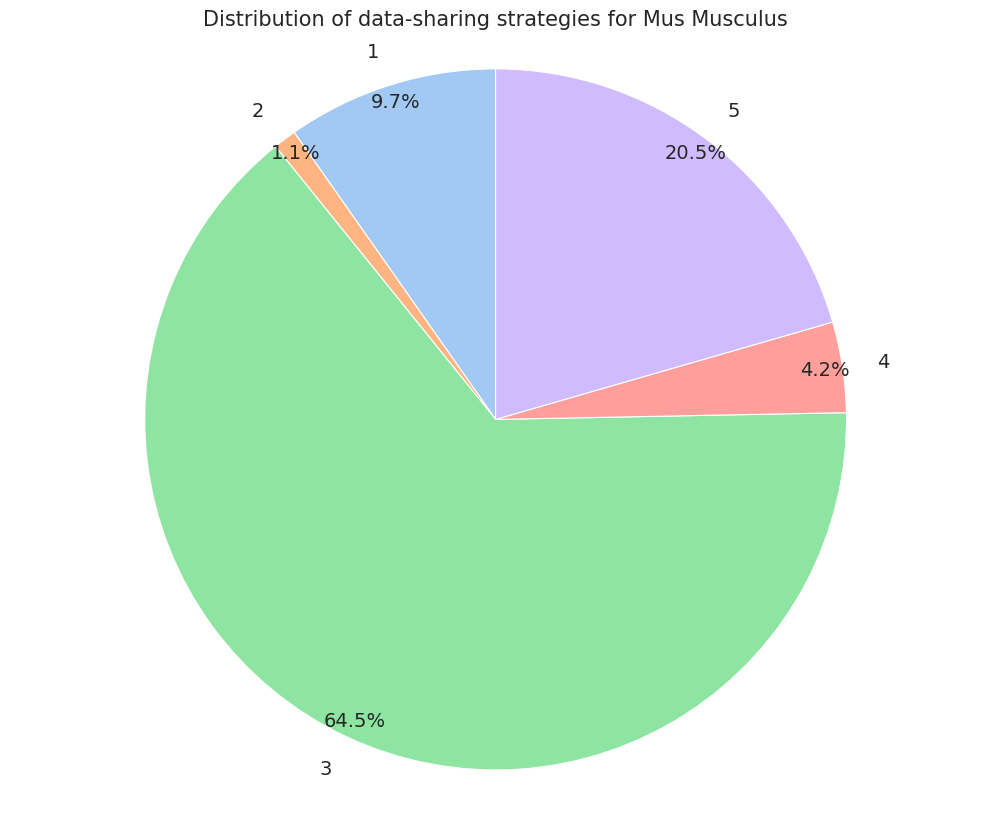

In [ ]:
mus_marker_counts = whole_repo.loc[whole_repo['Scientific_Name'] == 'Mus musculus']['Marker'].value_counts()
custom_color = ['#a1c9f4','#ffb482','#8de5a1','#ff9f9b','#d0bbff']
marker_new_order = ['1','2','3','4','5']
mus_marker_counts = mus_marker_counts.reindex(marker_new_order)
sns.set_context("paper")

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(mus_marker_counts.values,
                                   labels=mus_marker_counts.index,
                                   autopct='%1.1f%%',
                                   colors=custom_color,
                                   startangle=90,
                                   pctdistance=0.95,
                                   textprops={'fontsize': 14})
plt.axis('equal')
plt.tight_layout()

plt.title("Distribution of data-sharing strategies for Mus Musculus", size=15)

# How many days after publication do authors typically have to release the last one sequencing data?

In [1]:
import pandas as pd

df_SRA_repo = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations_and_latest_SRR_published_date.csv",encoding='utf-8')
df_GEO_repo = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_whole_analysis.csv")

selected_columns_for_SRA2 = ['Repository','days_later_than_paper_posting']
selected_columns_for_GEO2 = ['Repository','days_later_than_paper_posting']

picked_out_for_SRA = df_SRA_repo[selected_columns_for_SRA2]
picked_out_for_GEO = df_GEO_repo[selected_columns_for_GEO2]

In [2]:
days_in_delay = pd.concat([picked_out_for_SRA, picked_out_for_GEO])
print(len(days_in_delay))

7614


In [3]:
days_in_delay.dropna(inplace=True)
print(len(days_in_delay))

7247


In [4]:
count_days_in_delay_negative = days_in_delay[days_in_delay['days_later_than_paper_posting'] < 0]
count_days_in_delay_positive = days_in_delay[days_in_delay['days_later_than_paper_posting'] > 0]
count_days_in_delay_equal_to_0 = days_in_delay[days_in_delay['days_later_than_paper_posting'] == 0]

print(len(count_days_in_delay_negative))
print(len(count_days_in_delay_positive))
print(len(count_days_in_delay_equal_to_0))

5611
1510
126


In [5]:
count_days_in_delay_positive.max()

,0
Repository,SRA
days_later_than_paper_posting,2872.0


In [6]:
count_days_in_delay_positive_outof_60_days = count_days_in_delay_positive[count_days_in_delay_positive['days_later_than_paper_posting'] > 60]
count_days_in_delay_positive_outof_60_days

,Repository,days_later_than_paper_posting
6,SRA,111.0
7,SRA,111.0
11,SRA,254.0
15,SRA,171.0
16,SRA,171.0
...,...,...
3332,GEO,262.0
3334,GEO,363.0
3336,GEO,1749.0
3352,GEO,471.0


In [7]:
count_days_in_delay_positive.loc[count_days_in_delay_positive['days_later_than_paper_posting'] >= 1460].shape[0]

12

<ipython-input-8-c1d7a547d1c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.violinplot(data = count_days_in_delay_positive, x='days_later_than_paper_posting', y='Repository', inner='box', palette=color)


Text(0.5, 0, 'Last sequencing data release date minus publication posting date(days)')

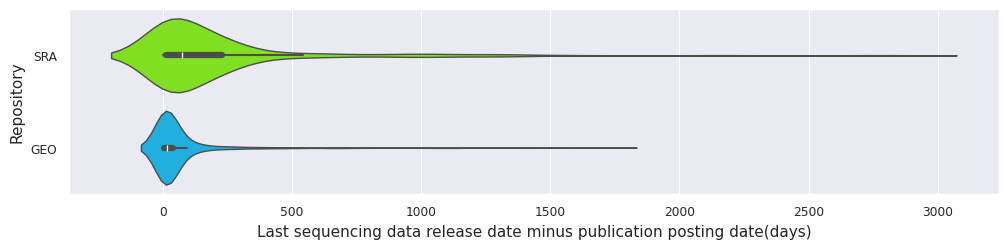

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")

figsize = (12, 1.2 * len(count_days_in_delay_positive['Repository'].unique()))
plt.figure(figsize=figsize)
color=['chartreuse','deepskyblue']
ax= sns.violinplot(data = count_days_in_delay_positive, x='days_later_than_paper_posting', y='Repository', inner='box', palette=color)

plt.ylabel("Repository", size=11)
plt.xlabel("Last sequencing data release date minus publication posting date(days)", size=11)

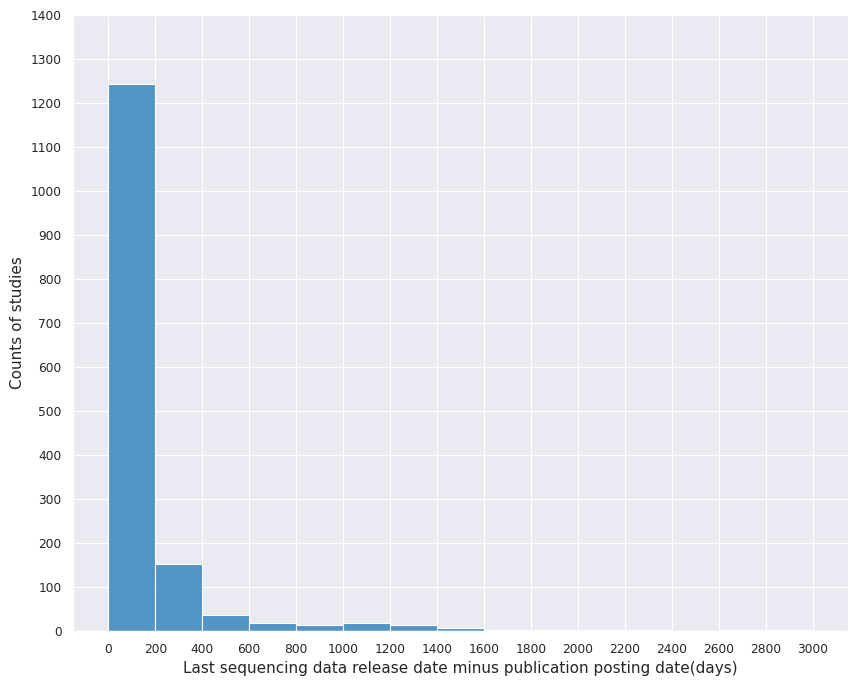

In [9]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=count_days_in_delay_positive, x='days_later_than_paper_posting', bins=range(0, 3001, 200))
plt.xlabel("Last sequencing data release date minus publication posting date(days)", size=11)
plt.ylabel("Counts of studies", size=11)
ax.set_xticks(range(0, 3001, 200))
ax.set_yticks(range(0, 1401, 100))

### Statistical Test

In [10]:
count_days_in_delay_positive

,Repository,days_later_than_paper_posting
1,SRA,29.0
6,SRA,111.0
7,SRA,111.0
10,SRA,1.0
11,SRA,254.0
...,...,...
3382,GEO,23.0
3388,GEO,22.0
3390,GEO,49.0
3397,GEO,17.0


In [11]:
# Calculate the median delating days for two repositories at first
median_sra = count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'SRA']['days_later_than_paper_posting'].median()
median_geo = count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'GEO']['days_later_than_paper_posting'].median()

print(f"Median for SRA: {median_sra}")
print(f"Median for GEO: {median_geo}")

Median for SRA: 76.0
Median for GEO: 15.0


Apply Shapiro-Wilk test to see if values within two groups follow the normal distribution:

Null Hypothesis (H0): The data follows a normal distribution. This means that there is no significant deviation from normality in the dataset.


Alternative Hypothesis (H1): The data does not follow a normal distribution.This means that there is a significant deviation from normality in the dataset.

In [12]:
import scipy.stats as stats
# Shapiro-Wilk test for normality
stat1, p1 = stats.shapiro(count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'SRA']['days_later_than_paper_posting'])
stat2, p2 = stats.shapiro(count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'GEO']['days_later_than_paper_posting'])

print('Group 1: Shapiro-Wilk test statistic =', stat1, ', p-value =', p1)
print('Group 2: Shapiro-Wilk test statistic =', stat2, ', p-value =', p2)

# Interpretation
alpha = 0.05
if p1 > alpha:
    print("Group 1: Fail to reject the null hypothesis (data follows normal distribution)")
else:
    print("Group 1: Reject the null hypothesis (data does not follow normal distribution)")

if p2 > alpha:
    print("Group 2: Fail to reject the null hypothesis (data follows normal distribution)")
else:
    print("Group 2: Reject the null hypothesis (data does not follow normal distribution)")

Group 1: Shapiro-Wilk test statistic = 0.567759507341158 , p-value = 1.0893674538653586e-37
Group 2: Shapiro-Wilk test statistic = 0.3939346194615929 , p-value = 3.3341881933487705e-46
Group 1: Reject the null hypothesis (data does not follow normal distribution)
Group 2: Reject the null hypothesis (data does not follow normal distribution)


The Levene's test is used to assess the equality of variances for a variable calculated for two or more groups.

Null Hypothesis (H0): The variances are equal across the groups.

Alternative Hypothesis (H1): At least one group has a different variance.

In [13]:
# Check homogeneity of variances using Levene's Test
stat, p = stats.levene(count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'SRA']['days_later_than_paper_posting'],
                       count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'GEO']['days_later_than_paper_posting'])
print('Levene’s test statistic:', stat)
print('p-value:', p)

Levene’s test statistic: 89.5838540965536
p-value: 1.0878789172381909e-20


The extremely small p-value suggests that there is a significant difference in the variances of the days-later-than-paper-posting between the two repositories.

In conclusion, the variance in the time delay between publication posting and the release of sequencing data is different for the SRA and GEO repositories.

In [ ]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'SRA']['days_later_than_paper_posting'],
                             count_days_in_delay_positive[count_days_in_delay_positive['Repository'] == 'GEO']['days_later_than_paper_posting'])

print(f"Mann-Whitney U test statistic: {stat}")
print(f"p-value: {p_value}")

Mann-Whitney U test statistic: 385701.0
p-value: 3.72112106021177e-35


This indicates that there is a statistically significant difference in the distribution of the days-later-than-paper-posting between the SRA and GEO repositories.

### The first gene expression data (for GSE IDs) and sequencing data (for SRA IDs) that were published later than formal paper:

In [ ]:
df_SRA_repo = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations_and_latest_SRR_published_date.csv",encoding='utf-8')
df_GEO_repo = pd.read_csv("final_all_True_Positive_3434_GSE_IDs_with_numberofcitations_and_whole_analysis.csv")

In [ ]:
selected_columns3 = ['Repository','GeneExpression_availa_subtracts_publication_posting']
df_GEO_repo_first_data_later_than = df_GEO_repo[selected_columns3]

selected_columns4 = ['Repository','sequencing_availa_subtracts_publication_posting']
df_SRA_repo_first_data_later_than = df_SRA_repo[selected_columns4]

print(len(df_GEO_repo_first_data_later_than))
print(len(df_SRA_repo_first_data_later_than))

3435
4179


In [ ]:
updated_df_GEO_repo_first_data_later_than = df_GEO_repo_first_data_later_than.loc[df_GEO_repo_first_data_later_than['GeneExpression_availa_subtracts_publication_posting'] > 0]
updated_df_SRA_repo_first_data_later_than = df_SRA_repo_first_data_later_than.loc[df_SRA_repo_first_data_later_than['sequencing_availa_subtracts_publication_posting'] > 0]

In [ ]:
updated_df_GEO_repo_first_data_later_than.rename(columns={'GeneExpression_availa_subtracts_publication_posting': 'delay_timing'}, inplace=True)
updated_df_SRA_repo_first_data_later_than.rename(columns={'sequencing_availa_subtracts_publication_posting': 'delay_timing'}, inplace=True)

<ipython-input-53-ba6a66694e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_GEO_repo_first_data_later_than.rename(columns={'GeneExpression_availa_subtracts_publication_posting': 'delay_timing'}, inplace=True)
<ipython-input-53-ba6a66694e57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_SRA_repo_first_data_later_than.rename(columns={'sequencing_availa_subtracts_publication_posting': 'delay_timing'}, inplace=True)


In [ ]:
updated_whole = pd.concat([updated_df_GEO_repo_first_data_later_than, updated_df_SRA_repo_first_data_later_than])

In [ ]:
updated_whole

,Repository,delay_timing
3,GEO,15.0
14,GEO,34.0
17,GEO,10.0
22,GEO,244.0
27,GEO,5.0
...,...,...
4102,SRA,1.0
4158,SRA,39.0
4160,SRA,33.0
4161,SRA,5.0


In [ ]:
out_of_60_days = updated_whole.loc[updated_whole['delay_timing'] > 60]
print(len(out_of_60_days))

291
